<a href="https://colab.research.google.com/github/JoaoCalheiros/data_analysis_case_study_1/blob/main/case_study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: How Does a Bike-Share Navigate Speedy Success?**

# **Introduction**


This analysis case study is one of the Capstones projects requirements for 
[Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).
For my analysis I used the bikeshare company's data of its customer's trip details over a 12 month period (April 2019 - March 2020). The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement).

The analysis follows the 6 phases of the Data Analysis process: Ask, Prepare, Process, Analyse, Share and Act.

**Ask**
  * Ask effective questions
  * Define the scope of the analysis
  * Define what success looks like

**Prepare**
  * Verify data’s integrity
  * Check data credibility and reliability
  * Check data types
  * Merge datasets

**Process**
  * Clean, Remove and Transform data
  * Document cleaning processes and results

**Analyse**
  * Identify patterns
  * Draw conclusions
  * Make predictions

**Share**
  * Create effective visuals
  * Create a story for data
  * Share insights to stakeholders

**Act**
  * Give recommendations based on insights
  * Solve problems
  * Create something new

# **1. Ask**


### **Scenario**
Marketing team needs information on how member and casual users differ in order to design effective marketing strategies, aimed at converting casual riders into annual members. 

### **Stakeholders**
  * Lily Moreno (Director of Marketing)
  * Cyclistic executive team

### **Deliverables**
  * How do annual members and casual riders use Cyclistic bikes differently?
  * Provide effective visuals and relevant data to support insights.
  * Use insights to give three recommendations to convert casual riders to member riders.

# **2. Prepare**


### **Data Sources**

Four Datasets have been used, each one corresponding to a trimester (1º trimester of 2020, 2º, 3º and 4º trimesters of 2019). Each dataset contains details of each ride, the type of user and station names. Users personal information has been ommited.
I decided to use Python for this analysis, utilizing the libraries Pandas, MatPlotLib, Numpy and Calendar. 

In [1]:
# Import necessary libs (calendar will be imported later)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Code to read csv file from google drive into Colaboratory:
# Retrieved from the following link
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Loading each Dataset into its own DataFrame and making a copy of each one

link = 'https://drive.google.com/file/d/1hcflN1Y8bqpcgDnF58UGjDl6h387K_ol/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
q1_2020_df = pd.read_csv('xclara.csv')
q1_2020_df_copy = q1_2020_df.copy()

q1_2020_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


In [4]:
link = 'https://drive.google.com/file/d/17-_ThtH4RADHbSsbI8F6ks5arWNu6IC-/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
q2_2019_df = pd.read_csv('xclara.csv')
q2_2019_df_copy = q2_2019_df.copy()

q2_2019_df.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [5]:
link = 'https://drive.google.com/file/d/1yHhVBpb6OAOdzcWXfm_StLrAn3Ma_rwv/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
q3_2019_df = pd.read_csv('xclara.csv')
q3_2019_df_copy = q3_2019_df.copy()

q3_2019_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [6]:
link = 'https://drive.google.com/file/d/1HRi7tSiuOjMD38aLSjTaMyrvNZ5oISre/view?usp=sharing'

# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('xclara.csv')  
  
q4_2019_df = pd.read_csv('xclara.csv')
q4_2019_df_copy = q4_2019_df.copy()

q4_2019_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [7]:
# Get a summary of the DataFrames I just created:

print(q1_2020_df.info())
print(q2_2019_df.info())
print(q3_2019_df.info())
print(q4_2019_df.info())

# Looking at the information bellow I conclude that:

# 'ride_id' and '01 - Rental Details Rental ID' must be renamed to 'trip_id' to match the 3th and 4th 2019 quarters DataFrames;
# 'rideable_type', '01 - Rental Details Bike ID' and 'bikeid' columns will all be renamed 'bike_id'; 
# drop latitude and longitude columns from the 2020 DataFrame as they aren't present on the 2019 Datasets;
# drop 'gender', 'tripduration' and 'birthyear' columns from the 2019 DataFrames as they were abandoned in 2020;
# rename some columns for better readability;
# '01 - Rental Details Rental ID', '01 - Rental Details Bike ID', 'trip_id' and 'bikeid' columns from the 2019 DataFrames must be converted from 'int64' to 'object' so I can stack the DataFrames correctly;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to

# **3. Process**

* Combine all the DataFrames into one DataFrame
* Clean data

In [8]:
# Rename columns where necessary so all 4 DataFrames have the same column names

q1_2020_df.rename(columns={
    'ride_id': 'trip_id',
    'rideable_type': 'bike_id',
    'started_at': 'start_date_time',
    'ended_at': 'end_date_time',
    'member_casual': 'user_type'
}, inplace=True)

q2_2019_df.rename(columns={
    '01 - Rental Details Rental ID': 'trip_id',
    '01 - Rental Details Local Start Time': 'start_date_time',
    '01 - Rental Details Local End Time': 'end_date_time',
    '01 - Rental Details Bike ID': 'bike_id',
    '01 - Rental Details Duration In Seconds Uncapped': 'trip_duration_sec',
    '03 - Rental Start Station ID': 'start_station_id',
    '03 - Rental Start Station Name': 'start_station_name',
    '02 - Rental End Station ID': 'end_station_id',
    '02 - Rental End Station Name': 'end_station_name',
    'User Type': 'user_type',
    'Member Gender': 'gender',
    '05 - Member Details Member Birthday Year': 'birthyear'
}, inplace=True)

q3_2019_df.rename(columns={
    'start_time': 'start_date_time',
    'end_time': 'end_date_time',
    'tripduration': 'trip_duration_sec',
    'bikeid': 'bike_id',
    'from_station_id': 'start_station_id',
    'from_station_name': 'start_station_name',
    'to_station_id': 'end_station_id',
    'to_station_name': 'end_station_name',
    'usertype': 'user_type'
}, inplace=True)

q4_2019_df.rename(columns={
    'start_time': 'start_date_time',
    'end_time': 'end_date_time',
    'tripduration': 'trip_duration_sec',
    'bikeid': 'bike_id',
    'from_station_id': 'start_station_id',
    'from_station_name': 'start_station_name',
    'to_station_id': 'end_station_id',
    'to_station_name': 'end_station_name',
    'usertype': 'user_type'
}, inplace=True)

# Drop unecessary columns (remember column names have been changes at this point)

q1_2020_df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)
q2_2019_df.drop(columns=['gender', 'birthyear', 'trip_duration_sec'], inplace=True)
q3_2019_df.drop(columns=['gender', 'birthyear', 'trip_duration_sec'], inplace=True)
q4_2019_df.drop(columns=['gender', 'birthyear', 'trip_duration_sec'], inplace=True)

# Make necessary changes to the column types (remember column names have been changes at this point)

q2_2019_df = q2_2019_df.astype({'trip_id': 'object', 'bike_id': 'object'})
q3_2019_df = q3_2019_df.astype({'trip_id': 'object', 'bike_id': 'object'})
q4_2019_df = q4_2019_df.astype({'trip_id': 'object', 'bike_id': 'object'})

In [9]:
# Check if changes have been successful

print(q1_2020_df.info())
print(q2_2019_df.info())
print(q3_2019_df.info())
print(q4_2019_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_id             426887 non-null  object 
 1   bike_id             426887 non-null  object 
 2   start_date_time     426887 non-null  object 
 3   end_date_time       426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   user_type           426887 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   trip_id             1108163 non-null  object
 1   start

In [10]:
# Join the 4 DataFrames into a single one 

final_df = pd.concat([q1_2020_df, q2_2019_df, q3_2019_df, q4_2019_df], ignore_index=True)
final_df.head()

# Lets see the head of the final DataFrame

,trip_id,bike_id,start_date_time,end_date_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,member


In [11]:
# and the tail

final_df.tail()

,trip_id,bike_id,start_date_time,end_date_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type
3879817,25962900,2196,2019-12-31 23:56:13,2020-01-01 00:15:45,Green St & Randolph St,112,Halsted St & Dickens Ave,225.0,Subscriber
3879818,25962901,4877,2019-12-31 23:56:34,2020-01-01 00:22:08,Millennium Park,90,Millennium Park,90.0,Subscriber
3879819,25962902,863,2019-12-31 23:57:05,2020-01-01 00:05:46,Michigan Ave & 8th St,623,Michigan Ave & Lake St,52.0,Subscriber
3879820,25962903,2637,2019-12-31 23:57:11,2020-01-01 00:05:45,Michigan Ave & 8th St,623,Michigan Ave & Lake St,52.0,Subscriber
3879821,25962904,5930,2019-12-31 23:57:17,2019-12-31 23:59:18,Broadway & Sheridan Rd,256,Sheridan Rd & Irving Park Rd,240.0,Subscriber


In [12]:
# Check if the 4 dataframes rows full count correspond to the final_df rows count

if len(q1_2020_df) + len(q2_2019_df) + len(q3_2019_df) + len(q4_2019_df) == len(final_df):
  print('Row count is correct')
else:
  print('Row count is incorrect')

Row count is correct


In [13]:
# Check for unique values on this particular column (I want only 2)
final_df.user_type.unique()

array(['member', 'casual', 'Subscriber', 'Customer'], dtype=object)

In [14]:
# Problems to fix:

# the 'user_type' columns contains 4 unique values instead of just 2. 'member' and 'Subscriber' must be reduced to 1 just like 'casual' and 'Customer';
# include some new columns of data, such as year, month, day in order to provide additional information
# since the 2020 DataFrame did not have the 'tripduration' column (which was droped from the other DFs previously) I will create a new column, called 'ride_len';

In [15]:
# Before I change 'Subscriber' to 'member' and 'Customer' to 'casual' lets add them up so I can check if the operation was successful later

member_count = len(final_df[final_df['user_type'] == 'member']) + len(final_df[final_df['user_type'] == 'Subscriber'])
casual_count = len(final_df[final_df['user_type'] == 'casual']) + len(final_df[final_df['user_type'] == 'Customer'])

print('There are {} members using Cyclistic.'.format(member_count))
print('There are {} casuals using Cyclistic.'.format(casual_count))

There are 2973868 members using Cyclistic.
There are 905954 casuals using Cyclistic.


In [16]:
# Now I replace the names and check again to see if the numbers match 

final_df.replace(to_replace=['Subscriber', 'Customer'], value=['member', 'casual'], inplace=True)
final_df.user_type.unique()

member_count = len(final_df[final_df['user_type'] == 'member'])
casual_count = len(final_df[final_df['user_type'] == 'casual'])

print('\n')
print('There are {} members using Cyclistic.'.format(member_count))
print('There are {} casuals using Cyclistic.'.format(casual_count))



There are 2973868 members using Cyclistic.
There are 905954 casuals using Cyclistic.


In [17]:
# Lets format both 'start_date_time' and 'end_date_time' to datetime 

final_df['start_date_time'] = pd.to_datetime(final_df['start_date_time'], format='%Y%m%d %H:%M:%S')
final_df['end_date_time'] = pd.to_datetime(final_df['end_date_time'], format='%Y%m%d %H:%M:%S')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879822 entries, 0 to 3879821
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   trip_id             object        
 1   bike_id             object        
 2   start_date_time     datetime64[ns]
 3   end_date_time       datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    int64         
 6   end_station_name    object        
 7   end_station_id      float64       
 8   user_type           object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 266.4+ MB


In [18]:
# Quick look the the head of the DataFrame

final_df.head()

,trip_id,bike_id,start_date_time,end_date_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,member


In [19]:
# Now I will create some new columns:
# year
# month (Jan, Feb, ...)
# day
# trip_start_time (E.g. 20:06:59)
# trip_end_time
# ride_len_seconds

# Lib I need to convert months from numbers to names: 1=Jan, 2=Feb, ...
import calendar   

final_df['year'] = pd.DatetimeIndex(final_df['start_date_time']).year
final_df['month'] = pd.DatetimeIndex(final_df['start_date_time']).month

# Convert month and day from numeric to names
final_df['month'] = final_df['month'].apply(lambda x: calendar.month_abbr[x])
final_df['day'] = final_df['start_date_time'].dt.day_name()

# trip_start_time, trip_end_time columns
final_df['trip_start_time'] = pd.to_datetime(final_df['start_date_time']).dt.time
final_df['trip_end_time'] = pd.to_datetime(final_df['end_date_time']).dt.time

# ride_len_seconds column AND convert it to seconds
final_df['ride_len_seconds'] = final_df['end_date_time'] - final_df['start_date_time'] 
final_df['ride_len_seconds'] = final_df['ride_len_seconds'].dt.total_seconds()

In [20]:
final_df.head()

,trip_id,bike_id,start_date_time,end_date_time,start_station_name,start_station_id,end_station_name,end_station_id,user_type,year,month,day,trip_start_time,trip_end_time,ride_len_seconds
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,member,2020,Jan,Tuesday,20:06:59,20:14:30,451.0
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,member,2020,Jan,Thursday,14:22:39,14:26:22,223.0
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,member,2020,Jan,Thursday,19:29:26,19:32:17,171.0
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,member,2020,Jan,Monday,16:17:07,16:25:56,529.0
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,member,2020,Jan,Thursday,08:37:16,08:42:48,332.0


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879822 entries, 0 to 3879821
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   trip_id             object        
 1   bike_id             object        
 2   start_date_time     datetime64[ns]
 3   end_date_time       datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    int64         
 6   end_station_name    object        
 7   end_station_id      float64       
 8   user_type           object        
 9   year                int64         
 10  month               object        
 11  day                 object        
 12  trip_start_time     object        
 13  trip_end_time       object        
 14  ride_len_seconds    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 444.0+ MB


In [22]:
# Check 'ride_len' column values for negative values
(final_df['ride_len_seconds'] < 0).values.any()

True

In [23]:
# The result is True, so there are negative values in the 'ride_len' column. I will drop those rows.

final_df_v3 = final_df.where(final_df['ride_len_seconds'] > 0) 

if (final_df_v3['ride_len_seconds'] < 0).values.any():
  print('There are stil negative values.')
  print('\n')
else:
  print('No more negative values')
  print('\n')

  
final_df_v3.info()

No more negative values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879822 entries, 0 to 3879821
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   trip_id             object        
 1   bike_id             object        
 2   start_date_time     datetime64[ns]
 3   end_date_time       datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   user_type           object        
 9   year                float64       
 10  month               object        
 11  day                 object        
 12  trip_start_time     object        
 13  trip_end_time       object        
 14  ride_len_seconds    float64       
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 444.0+ MB


# **4 & 5. Analyse & Share**



## **Data Manipulating**
  * Length of rides

In [24]:
# Descriptive Analysis on 'ride_len' in seconds for all users

print('Average ride len for all users in minutes: ', int(final_df_v3['ride_len_seconds'].mean()/60),'min')
print('Median ride len for all users in minutes:', int(final_df_v3['ride_len_seconds'].median()/60),'min')
print('Max ride len for all users in days:', int(((final_df_v3['ride_len_seconds'].max()/60)/60)/24),'days')
print('Min ride len for all users in seconds:', final_df_v3['ride_len_seconds'].min(),'sec')

Average ride len for all users in minutes:  24 min
Median ride len for all users in minutes: 11 min
Max ride len for all users in days: 108 days
Min ride len for all users in seconds: 1.0 sec


In [25]:
# Descriptive Analysis on 'ride_len' in seconds for casual and members

casuals_numeric_cols = final_df_v3.where(final_df_v3['user_type'] == 'casual')
members_numeric_cols = final_df_v3.where(final_df_v3['user_type'] == 'member')

print('Casual avg ride len in minutes: ', int(casuals_numeric_cols['ride_len_seconds'].mean()/60),'min')
print('Casual median ride len in minutes: ', int(casuals_numeric_cols['ride_len_seconds'].median()/60),'min')
print('Casual max ride len in days: ', int(((casuals_numeric_cols['ride_len_seconds'].max()/60)/60)/24),'days')
print('Casual min ride len in seconds: ', casuals_numeric_cols['ride_len_seconds'].min(), 'sec')
print('\n\n')
print('Member avg ride len in minutes: ', int(members_numeric_cols['ride_len_seconds'].mean()/60),'min')
print('Member median ride len in minutes: ', int(members_numeric_cols['ride_len_seconds'].median()/60),'min')
print('Member max ride len in days: ', int(((members_numeric_cols['ride_len_seconds'].max()/60)/60)/24),'days')
print('Member min ride len in seconds: ', members_numeric_cols['ride_len_seconds'].min(),'sec')

Casual avg ride len in minutes:  58 min
Casual median ride len in minutes:  25 min
Casual max ride len in days:  108 days
Casual min ride len in seconds:  1.0 sec



Member avg ride len in minutes:  14 min
Member median ride len in minutes:  9 min
Member max ride len in days:  104 days
Member min ride len in seconds:  1.0 sec


In [26]:
# Check if value 1 is significative in the ride_len col
values_1 = final_df_v3['ride_len_seconds'].where(final_df_v3['ride_len_seconds'] == 1.0).value_counts()[1]

print('values of 1.0: ', values_1)
print('total nr rides: ',len(final_df_v3))

perc = ((values_1 * 100) / len(final_df_v3)) * 100
perc_formated = "{:.2f}".format(perc)
print('\n')
print('Values of 1 in ride_len col equal to {}% of the total DataFrame.'.format(perc_formated) + ' Assuming its irrelevant.')

values of 1.0:  270
total nr rides:  3879822


Values of 1 in ride_len col equal to 0.70% of the total DataFrame. Assuming its irrelevant.


In [27]:
# See the average ride time for each day of the week for each user type

ride_len_days_df = pd.concat([final_df_v3['day'], final_df_v3['ride_len_seconds'], final_df_v3['user_type']], axis=1)

print(ride_len_days_df['user_type'].value_counts())
print('\n')

# Create DataFrame for casual users only
ride_len_days_casuals_df = ride_len_days_df.where(ride_len_days_df['user_type'] == 'casual').dropna()

mon_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Monday').mean()
tue_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Tuesday').mean()
wed_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Wednesday').mean()
thu_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Thursday').mean()
fri_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Friday').mean()
sat_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Saturday').mean()
sun_cas_ride_avg = ride_len_days_casuals_df['ride_len_seconds'].where(ride_len_days_casuals_df['day'] == 'Sunday').mean()

ride_len_days_casuals_df

member    2973861
casual     905738
Name: user_type, dtype: int64




,day,ride_len_seconds,user_type
20,Thursday,1801.0,casual
33,Sunday,1795.0,casual
152,Wednesday,7473.0,casual
157,Wednesday,589.0,casual
189,Monday,2479.0,casual
...,...,...,...
3879791,Tuesday,5415.0,casual
3879808,Tuesday,1541.0,casual
3879809,Tuesday,1928.0,casual
3879810,Tuesday,1937.0,casual


In [28]:
# Create DataFrame for members only

ride_len_days_members_df = ride_len_days_df.where(ride_len_days_df['user_type'] == 'member').dropna()

mon_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Monday').mean()
tue_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Tuesday').mean()
wed_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Wednesday').mean()
thu_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Thursday').mean()
fri_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Friday').mean()
sat_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Saturday').mean()
sun_mem_ride_avg = ride_len_days_members_df['ride_len_seconds'].where(ride_len_days_members_df['day'] == 'Sunday').mean()

ride_len_days_members_df

,day,ride_len_seconds,user_type
0,Tuesday,451.0,member
1,Thursday,223.0,member
2,Thursday,171.0,member
3,Monday,529.0,member
4,Thursday,332.0,member
...,...,...,...
3879817,Tuesday,1172.0,member
3879818,Tuesday,1534.0,member
3879819,Tuesday,521.0,member
3879820,Tuesday,514.0,member


## **Visualizations**
  * Average Ride Time for Each Day of the Week
  * Number of Users per month during a 1 year period


In [29]:
# I chose to display the time in minutes for better understanding the data

cols = {'casuals': [mon_cas_ride_avg / 60, tue_cas_ride_avg / 60, wed_cas_ride_avg / 60, thu_cas_ride_avg / 60, fri_cas_ride_avg / 60, sat_cas_ride_avg / 60, sun_cas_ride_avg / 60],
        'members': [mon_mem_ride_avg / 60, tue_mem_ride_avg / 60, wed_mem_ride_avg / 60, thu_mem_ride_avg / 60, fri_mem_ride_avg / 60, sat_mem_ride_avg / 60, sun_mem_ride_avg / 60]}

ride_times_viz_df = pd.DataFrame(data=cols, index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ride_times_viz_df

,casuals,members
Mon,55.611650,14.042876
Tue,59.505128,13.769046
Wed,61.530216,13.733301
Thu,61.012565,13.732130
Fri,62.644151,13.742175
Sat,55.531897,16.148895
Sun,59.690090,15.332910


Text(0, 0.5, 'Time in Minutes')

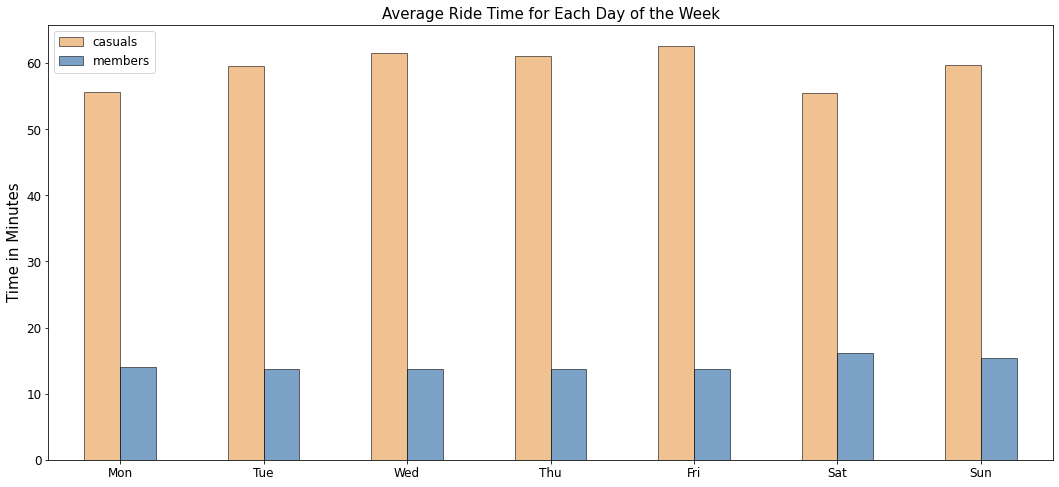

In [30]:
# Visualization 1. 
# Average Ride Time for Each Day of the Week 
# Members vs Casuals

viz_ride_times = ride_times_viz_df.plot(kind="bar", figsize=(18,8), color=['#e69138', '#10559A'], edgecolor='black', lw=1, alpha=0.55)
plt.legend(fontsize=12)
for text in plt.legend(fontsize=12).get_texts():
  text.set_color("black")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Average Ride Time for Each Day of the Week', fontsize=15, color='black')
plt.ylabel('Time in Minutes', fontsize=15)

Text(0, 0.5, 'Number of Users')

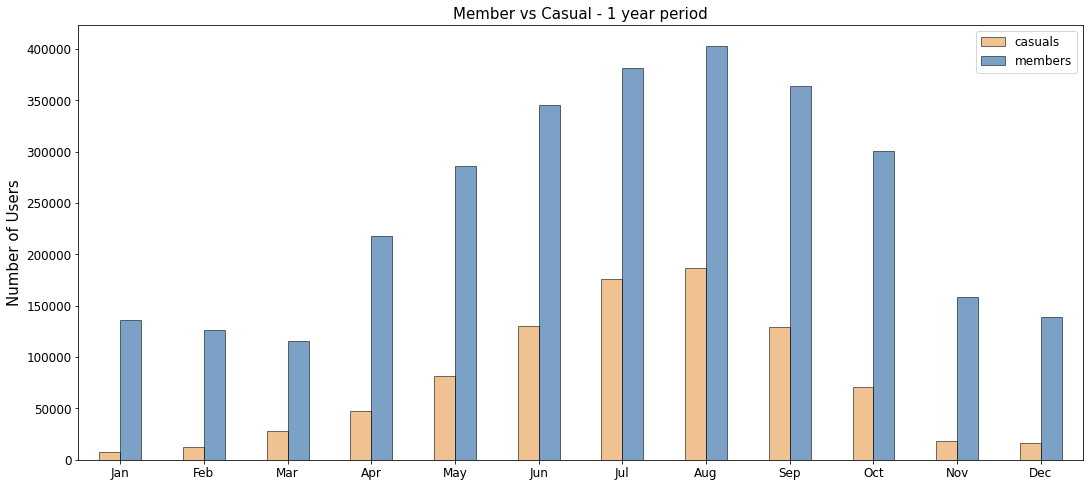

In [31]:
# Visualization 2. 
# Number of Users per month during a 1 year period
# Members vs Casuals

# Prepare the data
s_casuals = final_df_v3['month'].where(final_df_v3['user_type'] == 'casual').value_counts()
s_members = final_df_v3['month'].where(final_df_v3['user_type'] == 'member').value_counts()

s_casuals = s_casuals.rename('casuals')
s_members = s_members.rename('members')

sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the viz
viz_df = pd.concat([s_casuals, s_members], axis=1)

sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
viz_df = viz_df.reindex(sort_order, axis=0)

viz_cas_mem = viz_df.plot(kind="bar", figsize=(18,8), color=['#e69138', '#10559A'], edgecolor='black', lw=1, alpha=0.55)
plt.legend(fontsize=12)
for text in plt.legend(fontsize=12).get_texts():
  text.set_color("black")
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Member vs Casual - 1 year period', fontsize=15, color='black')
plt.ylabel('Number of Users', fontsize=15)

## **Data Manipulating**
  * Information on number of rides per weekday per month

In [32]:
best_hours_df = pd.concat([final_df_v3['day'], final_df_v3['month'], final_df_v3['trip_start_time'], final_df_v3['trip_end_time'], final_df_v3['user_type']], axis=1).dropna()

# Convert these 2 columns so I can extract the hours and create new columns
best_hours_df['trip_start_time'] = best_hours_df['trip_start_time'].astype('str')
best_hours_df['trip_end_time'] = best_hours_df['trip_end_time'].astype('str')

best_hours_df['start_hour'] = best_hours_df['trip_start_time'].str.split(':').str[0]
best_hours_df['end_hour'] = best_hours_df['trip_end_time'].str.split(':').str[0]

# Check total numbers of casuals vs members
best_hours_df['user_type'].value_counts()

member    2973861
casual     905738
Name: user_type, dtype: int64

In [33]:
# Analyse the users by trimester 
# Create temporary DF with only DAY and MONTH as columns for casual users
tri_data_casual = best_hours_df.where(best_hours_df['user_type'] == 'casual').dropna()
tri_data_casual.drop(columns=['trip_start_time', 'trip_end_time', 'user_type', 'start_hour', 'end_hour'], inplace=True)
tri_data_casual = tri_data_casual.reindex(columns=['month', 'day'])
tri_data_casual

# Create temporary DF with only DAY and MONTH as columns for member riders
tri_data_member = best_hours_df.where(best_hours_df['user_type'] == 'member').dropna()
tri_data_member.drop(columns=['trip_start_time', 'trip_end_time', 'user_type', 'start_hour', 'end_hour'], inplace=True)
tri_data_member = tri_data_member.reindex(columns=['month', 'day'])
tri_data_member

,month,day
0,Jan,Tuesday
1,Jan,Thursday
2,Jan,Thursday
3,Jan,Monday
4,Jan,Thursday
...,...,...
3879817,Dec,Tuesday
3879818,Dec,Tuesday
3879819,Dec,Tuesday
3879820,Dec,Tuesday


In [34]:
# Get the count of days per month of that same temporary DF for the casual users 
tri_data_casual = pd.DataFrame(data=tri_data_casual.value_counts())
tri_data_casual.rename(columns={0: 'count'}, inplace=True)
tri_data_casual

# Get the count of days per month of that same temporary DF for the member riders 
tri_data_member = pd.DataFrame(data=tri_data_member.value_counts())
tri_data_member.rename(columns={0: 'count'}, inplace=True)
tri_data_member

count
month day             
Aug   Thursday   78022
Jul   Wednesday  73553
      Tuesday    72544
Aug   Friday     71599
Sep   Monday     67041
...                ...
Dec   Sunday     12728
      Saturday   11814
Mar   Saturday    9738
Jan   Sunday      7318
      Saturday    6234

[84 rows x 1 columns]

## **Visualizations**
  * 1 Year period - number of rides per weekday per month (4)
  * Most used stations
  * Most used routes

#### **Information on number of rides per weekday per month - Casual Users**


In [35]:
# CASUAL USERS
# Print some info I got from the temporary DF about number of rides per weekday per month (JAN-FEB-MAR 2020)


jan_total_rides = tri_data_casual.loc['Jan']
jan_total_rides = jan_total_rides['count'].sum()

feb_total_rides = tri_data_casual.loc['Feb']
feb_total_rides = feb_total_rides['count'].sum()

mar_total_rides = tri_data_casual.loc['Mar']
mar_total_rides = mar_total_rides['count'].sum()

first_trimester_total_rides = jan_total_rides + feb_total_rides + mar_total_rides


jan_mon_rides = tri_data_casual.loc['Jan'].loc['Monday'][0]
jan_tue_rides = tri_data_casual.loc['Jan'].loc['Tuesday'][0]
jan_wed_rides = tri_data_casual.loc['Jan'].loc['Wednesday'][0]
jan_thu_rides = tri_data_casual.loc['Jan'].loc['Thursday'][0]
jan_fri_rides = tri_data_casual.loc['Jan'].loc['Friday'][0]
jan_sat_rides = tri_data_casual.loc['Jan'].loc['Saturday'][0]
jan_sun_rides = tri_data_casual.loc['Jan'].loc['Sunday'][0]

print('January 2020 number of rides: ', jan_total_rides,'\t\t->','{:.2f}'.format((jan_total_rides*100) / first_trimester_total_rides),'% of total rides in JANUARY in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Jan: ', jan_mon_rides,'\t->','{:.2f}'.format((jan_mon_rides*100) / jan_total_rides),'% of total rides on Mondays in JANUARY','\n',
      'Tuesday rides in Jan: ', jan_tue_rides,'\t->','{:.2f}'.format((jan_tue_rides*100) / jan_total_rides),'% of total rides on Tuesdays in JANUARY','\n',
      'Wednesday rides in Jan: ', jan_wed_rides,'\t->','{:.2f}'.format((jan_wed_rides*100) / jan_total_rides),'% of total rides on Wednesdays in JANUARY','\n',
      'Thursday rides in Jan: ', jan_thu_rides,'\t->','{:.2f}'.format((jan_thu_rides*100) / jan_total_rides),'% of total rides on Thursdays in JANUARY','\n',
      'Friday rides in Jan: ', jan_fri_rides,'\t->','{:.2f}'.format((jan_fri_rides*100) / jan_total_rides),'% of total rides on Fridays in JANUARY','\n',
      'Saturday rides in Jan: ', jan_sat_rides,'\t->','{:.2f}'.format((jan_sat_rides*100) / jan_total_rides),'% of total rides on Saturdays in JANUARY','\n',
      'Sunday rides in Jan: ', jan_sun_rides, '\t->','{:.2f}'.format((jan_sun_rides*100) / jan_total_rides),'% of total rides on Sundays in JANUARY')
print('\n')

feb_mon_rides = tri_data_casual.loc['Feb'].loc['Monday'][0]
feb_tue_rides = tri_data_casual.loc['Feb'].loc['Tuesday'][0]
feb_wed_rides = tri_data_casual.loc['Feb'].loc['Wednesday'][0]
feb_thu_rides = tri_data_casual.loc['Feb'].loc['Thursday'][0]
feb_fri_rides = tri_data_casual.loc['Feb'].loc['Friday'][0]
feb_sat_rides = tri_data_casual.loc['Feb'].loc['Saturday'][0]
feb_sun_rides = tri_data_casual.loc['Feb'].loc['Sunday'][0]

print('February number of rides: ', feb_total_rides,'\t\t->','{:.2f}'.format((feb_total_rides*100) / first_trimester_total_rides),'% of total rides in FEBRUARY in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Feb: ', feb_mon_rides,'\t->','{:.2f}'.format((feb_mon_rides*100) / feb_total_rides),'% of total rides on Mondays in FEBRUARY','\n',
      'Tuesday rides in Feb: ', feb_tue_rides,'\t->','{:.2f}'.format((feb_tue_rides*100) / feb_total_rides),'% of total rides on Tuesdays in FEBRUARY','\n',
      'Wednesday rides in Feb: ', feb_wed_rides,'\t->','{:.2f}'.format((feb_wed_rides*100) / feb_total_rides),'% of total rides on Wednesdays in FEBRUARY','\n',
      'Thursday rides in Feb: ', feb_thu_rides,'\t->','{:.2f}'.format((feb_thu_rides*100) / feb_total_rides),'% of total rides on Thursdays in FEBRUARY','\n',
      'Friday rides in Feb: ', feb_fri_rides,'\t->','{:.2f}'.format((feb_fri_rides*100) / feb_total_rides),'% of total rides on Fridays in FEBRUARY','\n',
      'Saturday rides in Feb: ', feb_sat_rides,'\t->','{:.2f}'.format((feb_sat_rides*100) / feb_total_rides),'% of total rides on Saturdays in FEBRUARY','\n',
      'Sunday rides in Feb: ', feb_sun_rides, '\t->','{:.2f}'.format((feb_sun_rides*100) / feb_total_rides),'% of total rides on Sundays in FEBRUARY')
print('\n')

mar_mon_rides = tri_data_casual.loc['Mar'].loc['Monday'][0]
mar_tue_rides = tri_data_casual.loc['Mar'].loc['Tuesday'][0]
mar_wed_rides = tri_data_casual.loc['Mar'].loc['Wednesday'][0]
mar_thu_rides = tri_data_casual.loc['Mar'].loc['Thursday'][0]
mar_fri_rides = tri_data_casual.loc['Mar'].loc['Friday'][0]
mar_sat_rides = tri_data_casual.loc['Mar'].loc['Saturday'][0]
mar_sun_rides = tri_data_casual.loc['Mar'].loc['Sunday'][0]

print('March number of rides: ', mar_total_rides,'\t\t->','{:.2f}'.format((mar_total_rides*100) / first_trimester_total_rides),'% of total rides in MARCH in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Mar: ', mar_mon_rides,'\t->','{:.2f}'.format((mar_mon_rides*100) / mar_total_rides),'% of total rides on Mondays in MARCH','\n',
      'Tuesday rides in Mar: ', mar_tue_rides,'\t->','{:.2f}'.format((mar_tue_rides*100) / mar_total_rides),'% of total rides on Tuesdays in MARCH','\n',
      'Wednesday rides in Mar: ', mar_wed_rides,'\t->','{:.2f}'.format((mar_wed_rides*100) / mar_total_rides),'% of total rides on Wednesdays in MARCH','\n',
      'Thursday rides in Mar: ', mar_thu_rides,'\t->','{:.2f}'.format((mar_thu_rides*100) / mar_total_rides),'% of total rides on Thursdays in MARCH','\n',
      'Friday rides in Mar: ', mar_fri_rides,'\t->','{:.2f}'.format((mar_fri_rides*100) / mar_total_rides),'% of total rides on Fridays in MARCH','\n',
      'Saturday rides in Mar: ', mar_sat_rides,'\t->','{:.2f}'.format((mar_sat_rides*100) / mar_total_rides),'% of total rides on Saturdays in MARCH','\n',
      'Sunday rides in Mar: ', mar_sun_rides, '\t->','{:.2f}'.format((mar_sun_rides*100) / mar_total_rides),'% of total rides on Sundays in MARCH')
print('\n')
print('The first trimester of 2020 had casual users go on a total of {} bike rides!'.format(first_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (APR-MAY-JUN 2019)

apr_total_rides = tri_data_casual.loc['Apr']
apr_total_rides = apr_total_rides['count'].sum()

may_total_rides = tri_data_casual.loc['May']
may_total_rides = may_total_rides['count'].sum()

jun_total_rides = tri_data_casual.loc['Jun']
jun_total_rides = jun_total_rides['count'].sum()

second_trimester_total_rides = apr_total_rides + may_total_rides + jun_total_rides

apr_mon_rides = tri_data_casual.loc['Apr'].loc['Monday'][0]
apr_tue_rides = tri_data_casual.loc['Apr'].loc['Tuesday'][0]
apr_wed_rides = tri_data_casual.loc['Apr'].loc['Wednesday'][0]
apr_thu_rides = tri_data_casual.loc['Apr'].loc['Thursday'][0]
apr_fri_rides = tri_data_casual.loc['Apr'].loc['Friday'][0]
apr_sat_rides = tri_data_casual.loc['Apr'].loc['Saturday'][0]
apr_sun_rides = tri_data_casual.loc['Apr'].loc['Sunday'][0]

print('April number of rides: ', apr_total_rides,'\t\t->','{:.2f}'.format((apr_total_rides*100) / second_trimester_total_rides),'% of total rides in APRIL in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in Apr: ', apr_mon_rides,'\t->','{:.2f}'.format((apr_mon_rides*100) / apr_total_rides),'% of total rides on Mondays in APRIL','\n',
      'Tuesday rides in Apr: ', apr_tue_rides,'\t->','{:.2f}'.format((apr_tue_rides*100) / apr_total_rides),'% of total rides on Tuesdays in APRIL','\n',
      'Wednesday rides in Apr: ', apr_wed_rides,'\t->','{:.2f}'.format((apr_wed_rides*100) / apr_total_rides),'% of total rides on Wednesdays in APRIL','\n',
      'Thursday rides in Apr: ', apr_thu_rides,'\t->','{:.2f}'.format((apr_thu_rides*100) / apr_total_rides),'% of total rides on Thursdays in APRIL','\n',
      'Friday rides in Apr: ', apr_fri_rides,'\t->','{:.2f}'.format((apr_fri_rides*100) / apr_total_rides),'% of total rides on Fridays in APRIL','\n',
      'Saturday rides in Apr: ', apr_sat_rides,'\t->','{:.2f}'.format((apr_sat_rides*100) / apr_total_rides),'% of total rides on Saturdays in APRIL','\n',
      'Sunday rides in Apr: ', apr_sun_rides, '\t->','{:.2f}'.format((apr_sun_rides*100) / apr_total_rides),'% of total rides on Sundays in APRIL')
print('\n')

may_mon_rides = tri_data_casual.loc['May'].loc['Monday'][0]
may_tue_rides = tri_data_casual.loc['May'].loc['Tuesday'][0]
may_wed_rides = tri_data_casual.loc['May'].loc['Wednesday'][0]
may_thu_rides = tri_data_casual.loc['May'].loc['Thursday'][0]
may_fri_rides = tri_data_casual.loc['May'].loc['Friday'][0]
may_sat_rides = tri_data_casual.loc['May'].loc['Saturday'][0]
may_sun_rides = tri_data_casual.loc['May'].loc['Sunday'][0]

print('May number of rides: ', may_total_rides,'\t\t->','{:.2f}'.format((may_total_rides*100) / second_trimester_total_rides),'% of total rides in MAY in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in May: ', may_mon_rides,'\t->','{:.2f}'.format((may_mon_rides*100) / may_total_rides),'% of total rides on Mondays in MAY','\n',
      'Tuesday rides in May: ', may_tue_rides,'\t->','{:.2f}'.format((may_tue_rides*100) / may_total_rides),'% of total rides on Tuesdays in MAY','\n',
      'Wednesday rides in May: ', may_wed_rides,'->','{:.2f}'.format((may_wed_rides*100) / may_total_rides),'% of total rides on Wednesdays in MAY','\n',
      'Thursday rides in May: ', may_thu_rides,'\t->','{:.2f}'.format((may_thu_rides*100) / may_total_rides),'% of total rides on Thursdays in MAY','\n',
      'Friday rides in May: ', may_fri_rides,'\t->','{:.2f}'.format((may_fri_rides*100) / may_total_rides),'% of total rides on Fridays in MAY','\n',
      'Saturday rides in May: ', may_sat_rides,'\t->','{:.2f}'.format((may_sat_rides*100) / may_total_rides),'% of total rides on Saturdays in MAY','\n',
      'Sunday rides in May: ', may_sun_rides, '\t->','{:.2f}'.format((may_sun_rides*100) / may_total_rides),'% of total rides on Sundays in MAY')
print('\n')

jun_mon_rides = tri_data_casual.loc['Jun'].loc['Monday'][0]
jun_tue_rides = tri_data_casual.loc['Jun'].loc['Tuesday'][0]
jun_wed_rides = tri_data_casual.loc['Jun'].loc['Wednesday'][0]
jun_thu_rides = tri_data_casual.loc['Jun'].loc['Thursday'][0]
jun_fri_rides = tri_data_casual.loc['Jun'].loc['Friday'][0]
jun_sat_rides = tri_data_casual.loc['Jun'].loc['Saturday'][0]
jun_sun_rides = tri_data_casual.loc['Jun'].loc['Sunday'][0]

print('June number of rides: ', jun_total_rides,'\t\t->','{:.2f}'.format((jun_total_rides*100) / second_trimester_total_rides),'% of total rides in JUNE in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in Jun: ', jun_mon_rides,'\t->','{:.2f}'.format((jun_mon_rides*100) / jun_total_rides),'% of total rides on Mondays in JUNE','\n',
      'Tuesday rides in Jun: ', jun_tue_rides,'\t->','{:.2f}'.format((jun_tue_rides*100) / jun_total_rides),'% of total rides on Tuesdays in JUNE','\n',
      'Wednesday rides in Jun: ', jun_wed_rides,'->','{:.2f}'.format((jun_wed_rides*100) / jun_total_rides),'% of total rides on Wednesdays in JUNE','\n',
      'Thursday rides in Jun: ', jun_thu_rides,'\t->','{:.2f}'.format((jun_thu_rides*100) / jun_total_rides),'% of total rides on Thursdays in JUNE','\n',
      'Friday rides in Jun: ', jun_fri_rides,'\t->','{:.2f}'.format((jun_fri_rides*100) / jun_total_rides),'% of total rides on Fridays in JUNE','\n',
      'Saturday rides in Jun: ', jun_sat_rides,'\t->','{:.2f}'.format((jun_sat_rides*100) / jun_total_rides),'% of total rides on Saturdays in JUNE','\n',
      'Sunday rides in Jun: ', jun_sun_rides, '\t->','{:.2f}'.format((jun_sun_rides*100) / jun_total_rides),'% of total rides on Sundays in JUNE')
print('\n')
print('The second trimester of 2019 had casual users go on a total of {} bike rides!'.format(second_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (JUL-AUG-SEP 2019)

jul_total_rides = tri_data_casual.loc['Jul']
jul_total_rides = jul_total_rides['count'].sum()

aug_total_rides = tri_data_casual.loc['Aug']
aug_total_rides = aug_total_rides['count'].sum()

sep_total_rides = tri_data_casual.loc['Sep']
sep_total_rides = sep_total_rides['count'].sum()

third_trimester_total_rides = jul_total_rides + aug_total_rides + sep_total_rides

jul_mon_rides = tri_data_casual.loc['Jul'].loc['Monday'][0]
jul_tue_rides = tri_data_casual.loc['Jul'].loc['Tuesday'][0]
jul_wed_rides = tri_data_casual.loc['Jul'].loc['Wednesday'][0]
jul_thu_rides = tri_data_casual.loc['Jul'].loc['Thursday'][0]
jul_fri_rides = tri_data_casual.loc['Jul'].loc['Friday'][0]
jul_sat_rides = tri_data_casual.loc['Jul'].loc['Saturday'][0]
jul_sun_rides = tri_data_casual.loc['Jul'].loc['Sunday'][0]

print('July number of rides: ', jul_total_rides,'\t\t->','{:.2f}'.format((jul_total_rides*100) / third_trimester_total_rides),'% of total rides in JULY in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Jul: ', jul_mon_rides,'\t->','{:.2f}'.format((jul_mon_rides*100) / jul_total_rides),'% of total rides on Mondays in JULY','\n',
      'Tuesday rides in Jul: ', jul_tue_rides,'\t->','{:.2f}'.format((jul_tue_rides*100) / jul_total_rides),'% of total rides on Tuesdays in JULY','\n',
      'Wednesday rides in Jul: ', jul_wed_rides,'->','{:.2f}'.format((jul_wed_rides*100) / jul_total_rides),'% of total rides on Wednesdays in JULY','\n',
      'Thursday rides in Jul: ', jul_thu_rides,'\t->','{:.2f}'.format((jul_thu_rides*100) / jul_total_rides),'% of total rides on Thursdays in JULY','\n',
      'Friday rides in Jul: ', jul_fri_rides,'\t->','{:.2f}'.format((jul_fri_rides*100) / jul_total_rides),'% of total rides on Fridays in JULY','\n',
      'Saturday rides in Jul: ', jul_sat_rides,'\t->','{:.2f}'.format((jul_sat_rides*100) / jul_total_rides),'% of total rides on Saturdays in JULY','\n',
      'Sunday rides in Jul: ', jul_sun_rides, '\t->','{:.2f}'.format((jul_sun_rides*100) / jul_total_rides),'% of total rides on Sundays in JULY')
print('\n')

aug_mon_rides = tri_data_casual.loc['Aug'].loc['Monday'][0]
aug_tue_rides = tri_data_casual.loc['Aug'].loc['Tuesday'][0]
aug_wed_rides = tri_data_casual.loc['Aug'].loc['Wednesday'][0]
aug_thu_rides = tri_data_casual.loc['Aug'].loc['Thursday'][0]
aug_fri_rides = tri_data_casual.loc['Aug'].loc['Friday'][0]
aug_sat_rides = tri_data_casual.loc['Aug'].loc['Saturday'][0]
aug_sun_rides = tri_data_casual.loc['Aug'].loc['Sunday'][0]

print('August number of rides: ', aug_total_rides,'\t\t->','{:.2f}'.format((aug_total_rides*100) / third_trimester_total_rides),'% of total rides in AUGUST in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Aug: ', aug_mon_rides,'\t->','{:.2f}'.format((aug_mon_rides*100) / aug_total_rides),'% of total rides on Mondays in AUGUST','\n',
      'Tuesday rides in Aug: ', aug_tue_rides,'\t->','{:.2f}'.format((aug_tue_rides*100) / aug_total_rides),'% of total rides on Tuesdays in AUGUST','\n',
      'Wednesday rides in Aug: ', aug_wed_rides,'->','{:.2f}'.format((aug_wed_rides*100) / aug_total_rides),'% of total rides on Wednesdays in AUGUST','\n',
      'Thursday rides in Aug: ', aug_thu_rides,'\t->','{:.2f}'.format((aug_thu_rides*100) / aug_total_rides),'% of total rides on Thursdays in AUGUST','\n',
      'Friday rides in Aug: ', aug_fri_rides,'\t->','{:.2f}'.format((aug_fri_rides*100) / aug_total_rides),'% of total rides on Fridays in AUGUST','\n',
      'Saturday rides in Aug: ', aug_sat_rides,'\t->','{:.2f}'.format((aug_sat_rides*100) / aug_total_rides),'% of total rides on Saturdays in AUGUST','\n',
      'Sunday rides in Aug: ', aug_sun_rides, '\t->','{:.2f}'.format((aug_sun_rides*100) / aug_total_rides),'% of total rides on Sundays in AUGUST')
print('\n')

sep_mon_rides = tri_data_casual.loc['Sep'].loc['Monday'][0]
sep_tue_rides = tri_data_casual.loc['Sep'].loc['Tuesday'][0]
sep_wed_rides = tri_data_casual.loc['Sep'].loc['Wednesday'][0]
sep_thu_rides = tri_data_casual.loc['Sep'].loc['Thursday'][0]
sep_fri_rides = tri_data_casual.loc['Sep'].loc['Friday'][0]
sep_sat_rides = tri_data_casual.loc['Sep'].loc['Saturday'][0]
sep_sun_rides = tri_data_casual.loc['Sep'].loc['Sunday'][0]

print('September number of rides: ', sep_total_rides,'\t\t->','{:.2f}'.format((sep_total_rides*100) / third_trimester_total_rides),'% of total rides in SEPTEMBER in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Sep: ', sep_mon_rides,'\t->','{:.2f}'.format((sep_mon_rides*100) / sep_total_rides),'% of total rides on Mondays in SEPTEMBER','\n',
      'Tuesday rides in Sep: ', sep_tue_rides,'\t->','{:.2f}'.format((sep_tue_rides*100) / sep_total_rides),'% of total rides on Tuesdays in SEPTEMBER','\n',
      'Wednesday rides in Sep: ', sep_wed_rides,'->','{:.2f}'.format((sep_wed_rides*100) / sep_total_rides),'% of total rides on Wednesdays in SEPTEMBER','\n',
      'Thursday rides in Sep: ', sep_thu_rides,'\t->','{:.2f}'.format((sep_thu_rides*100) / sep_total_rides),'% of total rides on Thursdays in SEPTEMBER','\n',
      'Friday rides in Sep: ', sep_fri_rides,'\t->','{:.2f}'.format((sep_fri_rides*100) / sep_total_rides),'% of total rides on Fridays in SEPTEMBER','\n',
      'Saturday rides in Sep: ', sep_sat_rides,'\t->','{:.2f}'.format((sep_sat_rides*100) / sep_total_rides),'% of total rides on Saturdays in SEPTEMBER','\n',
      'Sunday rides in Sep: ', sep_sun_rides, '\t->','{:.2f}'.format((sep_sun_rides*100) / sep_total_rides),'% of total rides on Sundays in SEPTEMBER')
print('\n')
print('The third trimester of 2020 had casual users go on a total of {} bike rides!'.format(third_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (OCT-NOV-DEC 2019)

oct_total_rides = tri_data_casual.loc['Oct']
oct_total_rides = oct_total_rides['count'].sum()

nov_total_rides = tri_data_casual.loc['Nov']
nov_total_rides = nov_total_rides['count'].sum()

dec_total_rides = tri_data_casual.loc['Dec']
dec_total_rides = dec_total_rides['count'].sum()

fourth_trimester_total_rides = oct_total_rides + nov_total_rides + dec_total_rides

oct_mon_rides = tri_data_casual.loc['Oct'].loc['Monday'][0]
oct_tue_rides = tri_data_casual.loc['Oct'].loc['Tuesday'][0]
oct_wed_rides = tri_data_casual.loc['Oct'].loc['Wednesday'][0]
oct_thu_rides = tri_data_casual.loc['Oct'].loc['Thursday'][0]
oct_fri_rides = tri_data_casual.loc['Oct'].loc['Friday'][0]
oct_sat_rides = tri_data_casual.loc['Oct'].loc['Saturday'][0]
oct_sun_rides = tri_data_casual.loc['Oct'].loc['Sunday'][0]

print('October number of rides: ', oct_total_rides,'\t\t->','{:.2f}'.format((oct_total_rides*100) / fourth_trimester_total_rides),'% of total rides in OCTOBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Oct: ', oct_mon_rides,'\t->','{:.2f}'.format((oct_mon_rides*100) / oct_total_rides),'% of total rides on Mondays in OCTOBER','\n',
      'Tuesday rides in Oct: ', oct_tue_rides,'\t->','{:.2f}'.format((oct_tue_rides*100) / oct_total_rides),'% of total rides on Tuesdays in OCTOBER','\n',
      'Wednesday rides in Oct: ', oct_wed_rides,'\t->','{:.2f}'.format((oct_wed_rides*100) / oct_total_rides),'% of total rides on Wednesdays in OCTOBER','\n',
      'Thursday rides in Oct: ', oct_thu_rides,'\t->','{:.2f}'.format((oct_thu_rides*100) / oct_total_rides),'% of total rides on Thursdays in OCTOBER','\n',
      'Friday rides in Oct: ', oct_fri_rides,'\t->','{:.2f}'.format((oct_fri_rides*100) / oct_total_rides),'% of total rides on Fridays in OCTOBER','\n',
      'Saturday rides in Oct: ', oct_sat_rides,'\t->','{:.2f}'.format((oct_sat_rides*100) / oct_total_rides),'% of total rides on Saturdays in OCTOBER','\n',
      'Sunday rides in Oct: ', oct_sun_rides, '\t->','{:.2f}'.format((oct_sun_rides*100) / oct_total_rides),'% of total rides on Sundays in OCTOBER')
print('\n')

nov_mon_rides = tri_data_casual.loc['Nov'].loc['Monday'][0]
nov_tue_rides = tri_data_casual.loc['Nov'].loc['Tuesday'][0]
nov_wed_rides = tri_data_casual.loc['Nov'].loc['Wednesday'][0]
nov_thu_rides = tri_data_casual.loc['Nov'].loc['Thursday'][0]
nov_fri_rides = tri_data_casual.loc['Nov'].loc['Friday'][0]
nov_sat_rides = tri_data_casual.loc['Nov'].loc['Saturday'][0]
nov_sun_rides = tri_data_casual.loc['Nov'].loc['Sunday'][0]

print('November number of rides: ', nov_total_rides,'\t\t->','{:.2f}'.format((nov_total_rides*100) / fourth_trimester_total_rides),'% of total rides in NOVEMBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Nov: ', nov_mon_rides,'\t->','{:.2f}'.format((nov_mon_rides*100) / nov_total_rides),'% of total rides on Mondays in NOVEMBER','\n',
      'Tuesday rides in Nov: ', nov_tue_rides,'\t->','{:.2f}'.format((nov_tue_rides*100) / nov_total_rides),'% of total rides on Tuesdays in NOVEMBER','\n',
      'Wednesday rides in Nov: ', nov_wed_rides,'\t->','{:.2f}'.format((nov_wed_rides*100) / nov_total_rides),'% of total rides on Wednesdays in NOVEMBER','\n',
      'Thursday rides in Nov: ', nov_thu_rides,'\t->','{:.2f}'.format((nov_thu_rides*100) / nov_total_rides),'% of total rides on Thursdays in NOVEMBER','\n',
      'Friday rides in Nov: ', nov_fri_rides,'\t->','{:.2f}'.format((nov_fri_rides*100) / nov_total_rides),'% of total rides on Fridays in NOVEMBER','\n',
      'Saturday rides in Nov: ', nov_sat_rides,'\t->','{:.2f}'.format((nov_sat_rides*100) / nov_total_rides),'% of total rides on Saturdays in NOVEMBER','\n',
      'Sunday rides in Nov: ', nov_sun_rides, '\t->','{:.2f}'.format((nov_sun_rides*100) / nov_total_rides),'% of total rides on Sundays in NOVEMBER')
print('\n')

dec_mon_rides = tri_data_casual.loc['Dec'].loc['Monday'][0]
dec_tue_rides = tri_data_casual.loc['Dec'].loc['Tuesday'][0]
dec_wed_rides = tri_data_casual.loc['Dec'].loc['Wednesday'][0]
dec_thu_rides = tri_data_casual.loc['Dec'].loc['Thursday'][0]
dec_fri_rides = tri_data_casual.loc['Dec'].loc['Friday'][0]
dec_sat_rides = tri_data_casual.loc['Dec'].loc['Saturday'][0]
dec_sun_rides = tri_data_casual.loc['Dec'].loc['Sunday'][0]

print('December number of rides: ', dec_total_rides,'\t\t->','{:.2f}'.format((dec_total_rides*100) / fourth_trimester_total_rides),'% of total rides in DECEMBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Dec: ', dec_mon_rides,'\t->','{:.2f}'.format((dec_mon_rides*100) / dec_total_rides),'% of total rides on Mondays in DECEMBER','\n',
      'Tuesday rides in Dec: ', dec_tue_rides,'\t->','{:.2f}'.format((dec_tue_rides*100) / dec_total_rides),'% of total rides on Tuesdays in DECEMBER','\n',
      'Wednesday rides in Dec: ', dec_wed_rides,'\t->','{:.2f}'.format((dec_wed_rides*100) / dec_total_rides),'% of total rides on Wednesdays in DECEMBER','\n',
      'Thursday rides in Dec: ', dec_thu_rides,'\t->','{:.2f}'.format((dec_thu_rides*100) / dec_total_rides),'% of total rides on Thursdays in DECEMBER','\n',
      'Friday rides in Dec: ', dec_fri_rides,'\t->','{:.2f}'.format((dec_fri_rides*100) / dec_total_rides),'% of total rides on Fridays in DECEMBER','\n',
      'Saturday rides in Dec: ', dec_sat_rides,'\t->','{:.2f}'.format((dec_sat_rides*100) / dec_total_rides),'% of total rides on Saturdays in DECEMBER','\n',
      'Sunday rides in Dec: ', dec_sun_rides, '\t->','{:.2f}'.format((dec_sun_rides*100) / dec_total_rides),'% of total rides on Sundays in DECEMBER')
print('\n')
print('The fourth trimester of 2020 had casual users go on a total of {} bike rides!'.format(fourth_trimester_total_rides))

# Create variables to use in the visualization comparing members usage vs casuals usage by month
jan_casuals = jan_total_rides
feb_casuals = feb_total_rides
mar_casuals = mar_total_rides
apr_casuals = apr_total_rides
may_casuals = may_total_rides
jun_casuals = jun_total_rides
jul_casuals = jul_total_rides
aug_casuals = aug_total_rides
sep_casuals = sep_total_rides
oct_casuals = oct_total_rides
nov_casuals = nov_total_rides
dec_casuals = dec_total_rides

January 2020 number of rides:  7785 		-> 16.13 % of total rides in JANUARY in the FIRST TRIMESTER OF 2020 
 Monday rides in Jan:  863 	-> 11.09 % of total rides on Mondays in JANUARY 
 Tuesday rides in Jan:  1076 	-> 13.82 % of total rides on Tuesdays in JANUARY 
 Wednesday rides in Jan:  1289 	-> 16.56 % of total rides on Wednesdays in JANUARY 
 Thursday rides in Jan:  1573 	-> 20.21 % of total rides on Thursdays in JANUARY 
 Friday rides in Jan:  1342 	-> 17.24 % of total rides on Fridays in JANUARY 
 Saturday rides in Jan:  722 	-> 9.27 % of total rides on Saturdays in JANUARY 
 Sunday rides in Jan:  920 	-> 11.82 % of total rides on Sundays in JANUARY


February number of rides:  12860 		-> 26.64 % of total rides in FEBRUARY in the FIRST TRIMESTER OF 2020 
 Monday rides in Feb:  1067 	-> 8.30 % of total rides on Mondays in FEBRUARY 
 Tuesday rides in Feb:  938 	-> 7.29 % of total rides on Tuesdays in FEBRUARY 
 Wednesday rides in Feb:  957 	-> 7.44 % of total rides on Wednesdays in

#### **1 Year period - number of rides per weekday per month (4 viz) - Casual Users**

In [36]:
# Perform some calculations in order to get numbers to construct my pie chart.

print('Jan-Mon: ','{:.2f}'.format((jan_mon_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Tue: ','{:.2f}'.format((jan_tue_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Wed: ','{:.2f}'.format((jan_wed_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Thu: ','{:.2f}'.format((jan_thu_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Fri: ','{:.2f}'.format((jan_fri_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Sat: ','{:.2f}'.format((jan_sat_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Sun: ','{:.2f}'.format((jan_sun_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Feb-Mon: ','{:.2f}'.format((feb_mon_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Tue: ','{:.2f}'.format((feb_tue_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Wed: ','{:.2f}'.format((feb_wed_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Thu: ','{:.2f}'.format((feb_thu_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Fri: ','{:.2f}'.format((feb_fri_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Sat: ','{:.2f}'.format((feb_sat_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Sun: ','{:.2f}'.format((feb_sun_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Mar-Mon: ','{:.2f}'.format((mar_mon_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Tue: ','{:.2f}'.format((mar_tue_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Wed: ','{:.2f}'.format((mar_wed_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Thu: ','{:.2f}'.format((mar_thu_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Fri: ','{:.2f}'.format((mar_fri_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Sat: ','{:.2f}'.format((mar_sat_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Sun: ','{:.2f}'.format((mar_sun_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Apr-Mon: ','{:.2f}'.format((apr_mon_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Tue: ','{:.2f}'.format((apr_tue_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Wed: ','{:.2f}'.format((apr_wed_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Thu: ','{:.2f}'.format((apr_thu_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Fri: ','{:.2f}'.format((apr_fri_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100)) 
print('Apr-Sat: ','{:.2f}'.format((apr_sat_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Sun: ','{:.2f}'.format((apr_sun_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('May-Mon: ','{:.2f}'.format((may_mon_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Tue: ','{:.2f}'.format((may_tue_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Wed: ','{:.2f}'.format((may_wed_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Thu: ','{:.2f}'.format((may_thu_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Fri: ','{:.2f}'.format((may_fri_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100)) 
print('May-Sat: ','{:.2f}'.format((may_sat_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Sun: ','{:.2f}'.format((may_sun_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('Jun-Mon: ','{:.2f}'.format((jun_mon_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Tue: ','{:.2f}'.format((jun_tue_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Wed: ','{:.2f}'.format((jun_wed_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Thu: ','{:.2f}'.format((jun_thu_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Fri: ','{:.2f}'.format((jun_fri_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Sat: ','{:.2f}'.format((jun_sat_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Sun: ','{:.2f}'.format((jun_sun_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('Jul-Mon: ','{:.2f}'.format((jul_mon_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Tue: ','{:.2f}'.format((jul_tue_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Wed: ','{:.2f}'.format((jul_wed_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Thu: ','{:.2f}'.format((jul_thu_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Fri: ','{:.2f}'.format((jul_fri_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100)) 
print('Jul-Sat: ','{:.2f}'.format((jul_sat_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Sun: ','{:.2f}'.format((jul_sun_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Aug-Mon: ','{:.2f}'.format((aug_mon_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Tue: ','{:.2f}'.format((aug_tue_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Wed: ','{:.2f}'.format((aug_wed_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Thu: ','{:.2f}'.format((aug_thu_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Fri: ','{:.2f}'.format((aug_fri_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100)) 
print('Aug-Sat: ','{:.2f}'.format((aug_sat_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Sun: ','{:.2f}'.format((aug_sun_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Sep-Mon: ','{:.2f}'.format((sep_mon_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Tue: ','{:.2f}'.format((sep_tue_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Wed: ','{:.2f}'.format((sep_wed_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Thu: ','{:.2f}'.format((sep_thu_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Fri: ','{:.2f}'.format((sep_fri_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Sat: ','{:.2f}'.format((sep_sat_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Sun: ','{:.2f}'.format((sep_sun_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Oct-Mon: ','{:.2f}'.format((oct_mon_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Tue: ','{:.2f}'.format((oct_tue_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Wed: ','{:.2f}'.format((oct_wed_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Thu: ','{:.2f}'.format((oct_thu_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Fri: ','{:.2f}'.format((oct_fri_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100)) 
print('Oct-Sat: ','{:.2f}'.format((oct_sat_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Sun: ','{:.2f}'.format((oct_sun_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('\n')
print('Nov-Mon: ','{:.2f}'.format((nov_mon_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Tue: ','{:.2f}'.format((nov_tue_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Wed: ','{:.2f}'.format((nov_wed_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Thu: ','{:.2f}'.format((nov_thu_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Fri: ','{:.2f}'.format((nov_fri_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100)) 
print('Nov-Sat: ','{:.2f}'.format((nov_sat_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Sun: ','{:.2f}'.format((nov_sun_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('\n')
print('Dec-Mon: ','{:.2f}'.format((dec_mon_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Tue: ','{:.2f}'.format((dec_tue_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Wed: ','{:.2f}'.format((dec_wed_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Thu: ','{:.2f}'.format((dec_thu_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Fri: ','{:.2f}'.format((dec_fri_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Sat: ','{:.2f}'.format((dec_sat_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Sun: ','{:.2f}'.format((dec_sun_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))

Jan-Mon:  1.79
Jan-Tue:  2.23
Jan-Wed:  2.67
Jan-Thu:  3.26
Jan-Fri:  2.78
Jan-Sat:  1.50
Jan-Sun:  1.91


Feb-Mon:  2.21
Feb-Tue:  1.94
Feb-Wed:  1.98
Feb-Thu:  1.37
Feb-Fri:  2.58
Feb-Sat:  6.72
Feb-Sun:  9.83


Mar-Mon:  5.95
Mar-Tue:  6.69
Mar-Wed:  7.52
Mar-Thu:  5.42
Mar-Fri:  5.27
Mar-Sat:  7.28
Mar-Sun:  19.11


Apr-Mon:  3.14
Apr-Tue:  2.16
Apr-Wed:  1.59
Apr-Thu:  1.05
Apr-Fri:  2.19
Apr-Sat:  3.99
Apr-Sun:  4.28


May-Mon:  2.92
May-Tue:  1.72
May-Wed:  3.89
May-Thu:  3.88
May-Fri:  4.53
May-Sat:  7.09
May-Sun:  7.42


Jun-Mon:  4.57
Jun-Tue:  5.98
Jun-Wed:  4.11
Jun-Thu:  4.62
Jun-Fri:  7.38
Jun-Sat:  13.90
Jun-Sun:  9.62


Jul-Mon:  4.33
Jul-Tue:  4.09
Jul-Wed:  4.53
Jul-Thu:  4.36
Jul-Fri:  4.85
Jul-Sat:  7.75
Jul-Sun:  5.81


Aug-Mon:  2.94
Aug-Tue:  3.15
Aug-Wed:  3.45
Aug-Thu:  5.16
Aug-Fri:  6.28
Aug-Sat:  10.35
Aug-Sun:  6.67


Sep-Mon:  4.78
Sep-Tue:  2.59
Sep-Wed:  2.63
Sep-Thu:  2.98
Sep-Fri:  2.74
Sep-Sat:  5.60
Sep-Sun:  4.96


Oct-Mon:  8.15
Oct-Tue:  8.38
Oct-

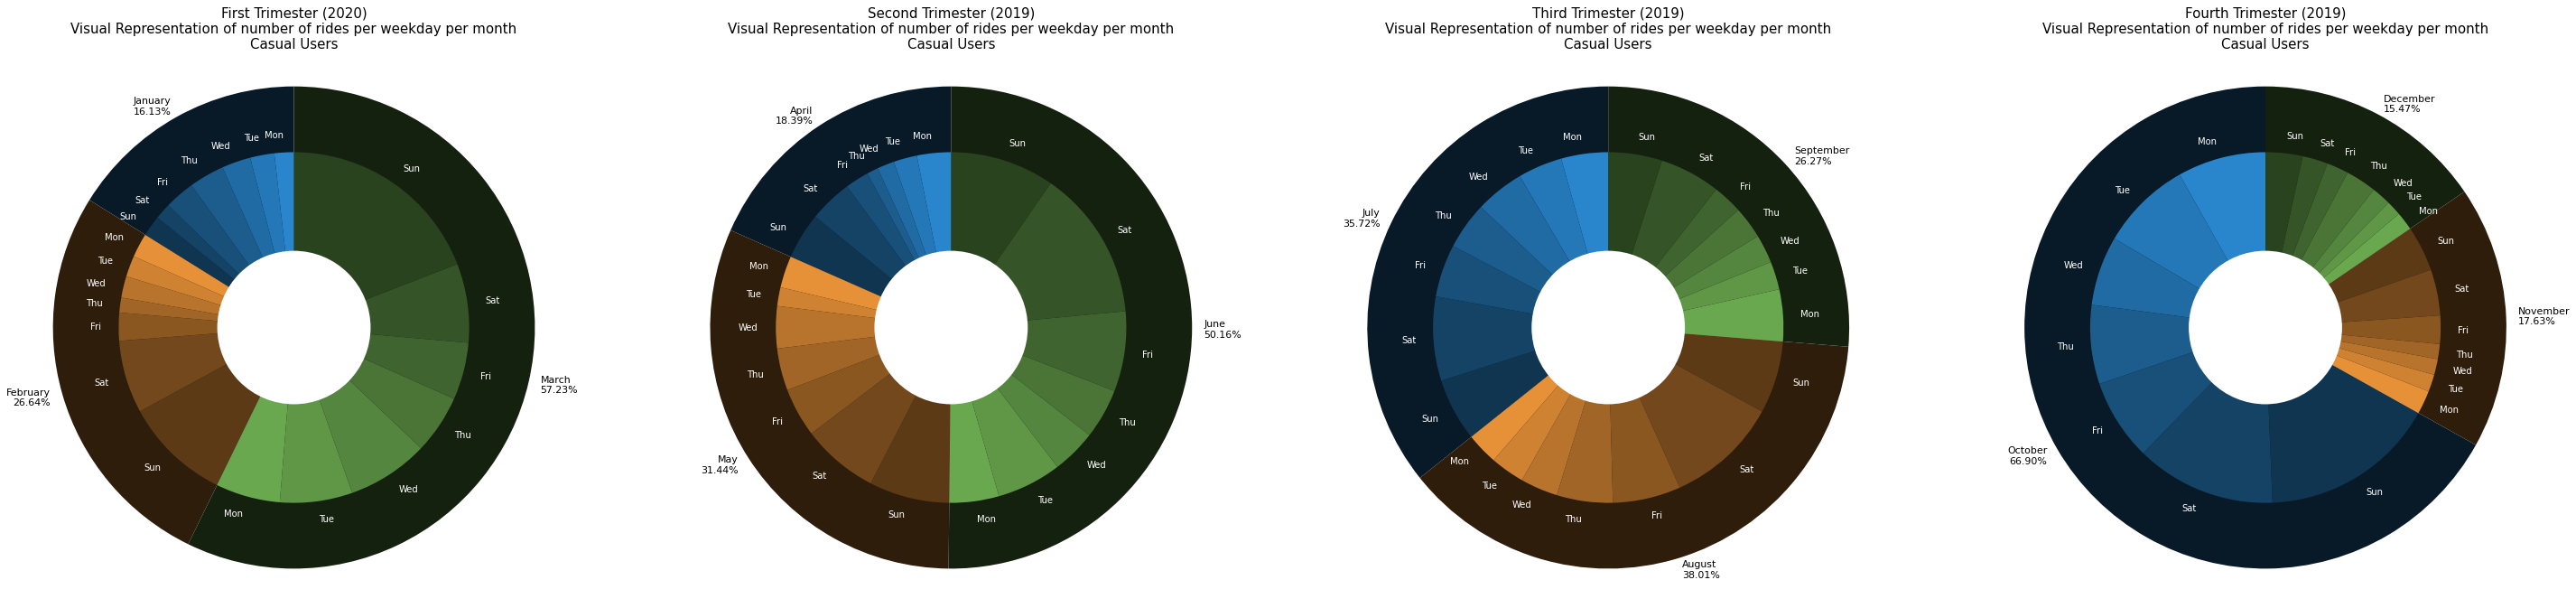

In [59]:
# CASUAL RIDERS
# First tri 2020 
# Plot setup
months = ['January\n16.13%', 'February\n26.64%', 'March\n57.23%']
months_sizes = [16.13, 26.64, 57.23]
months_colors = ['#081a28', '#2e1d0b', '#15210f']

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes = [1.79, 2.23, 2.67, 3.26, 2.78, 1.50, 1.91, 2.21, 1.94, 1.98, 1.37, 2.58, 6.72, 9.83, 5.95, 6.69, 7.52, 5.42, 5.27, 7.28, 19.11]
weekdays_colors = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Second tri 19
# Plot setup
months_2 = ['April\n18.39%', 'May\n31.44%', 'June\n50.16%']
months_sizes_2 = [18.39, 31.44, 50.16]
months_colors_2 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_2 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_2 = [3.14, 2.16, 1.59, 1.05, 2.19, 3.99, 4.28, 2.92, 1.72, 3.89, 3.88, 4.53, 7.09, 7.42, 4.57, 5.98, 4.11, 4.62, 7.38, 13.90, 9.62]
weekdays_colors_2 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Third tri 19
# Plot setup
months_3 = ['July\n35.72%', 'August\n38.01%', 'September\n26.27%']
months_sizes_3 = [35.72, 38.01, 26.27]
months_colors_3 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_3 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_3 = [4.33, 4.09, 4.53, 4.36, 4.85, 7.75, 5.81, 2.94, 3.15, 3.45, 5.16, 6.28, 10.35, 6.67, 4.78, 2.59, 2.63, 2.98, 2.74, 5.60, 4.96]
weekdays_colors_3 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Fourth tri 19
# Plot setup
months_4 = ['October\n66.90%', 'November\n17.63%', 'December\n15.47%']
months_sizes_4 = [66.90, 17.63, 15.47]
months_colors_4 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_4 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_4 = [8.15, 8.38, 6.40, 7.28, 7.52, 12.92, 16.24, 2.19, 1.58, 1.46, 1.38, 2.61, 4.24, 4.19, 1.70, 1.38, 1.78, 2.84, 2.02, 2.33, 3.42]
weekdays_colors_4 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']


# Create figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(50,25))
# Plot using ax1
outer_circle = ax1.pie(months_sizes, labels=months, colors=months_colors, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle = ax1.pie(weekdays_sizes, labels=weekdays, colors=weekdays_colors, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax1.add_artist(centre_circle)
ax1.set_title('First Trimester (2020)\nVisual Representation of number of rides per weekday per month\nCasual Users', loc='center', fontsize=15, color='black')

# Plot using ax2
outer_circle_2 = ax2.pie(months_sizes_2, labels=months_2, colors=months_colors_2, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_2 = ax2.pie(weekdays_sizes_2, labels=weekdays_2, colors=weekdays_colors_2, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_2 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax2.add_artist(centre_circle_2)
ax2.set_title('Second Trimester (2019)\nVisual Representation of number of rides per weekday per month\nCasual Users', loc='center', fontsize=15, color='black')

# Plot using ax3
outer_circle_3 = ax3.pie(months_sizes_3, labels=months_3, colors=months_colors_3, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_3 = ax3.pie(weekdays_sizes_3, labels=weekdays_3, colors=weekdays_colors_3, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_3 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax3.add_artist(centre_circle_3)
ax3.set_title('Third Trimester (2019)\nVisual Representation of number of rides per weekday per month\nCasual Users', loc='center', fontsize=15, color='black')

# Plot using ax4
outer_circle_4 = ax4.pie(months_sizes_4, labels=months_4, colors=months_colors_4, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_4 = ax4.pie(weekdays_sizes_4, labels=weekdays_4, colors=weekdays_colors_4, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_4 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax4.add_artist(centre_circle_4)
ax4.set_title('Fourth Trimester (2019)\nVisual Representation of number of rides per weekday per month\nCasual Users', loc='center', fontsize=15, color='black')
plt.show()

#### **Information on number of rides per weekday per month - Member Riders**

In [38]:
# ANNUAL MEMBERS
# Print some info I got from the temporary DF about number of rides per weekday per month (JAN-FEB-MAR 2020)


jan_total_rides = tri_data_member.loc['Jan']
jan_total_rides = jan_total_rides['count'].sum()

feb_total_rides = tri_data_member.loc['Feb']
feb_total_rides = feb_total_rides['count'].sum()

mar_total_rides = tri_data_member.loc['Mar']
mar_total_rides = mar_total_rides['count'].sum()

first_trimester_total_rides = jan_total_rides + feb_total_rides + mar_total_rides


jan_mon_rides = tri_data_member.loc['Jan'].loc['Monday'][0]
jan_tue_rides = tri_data_member.loc['Jan'].loc['Tuesday'][0]
jan_wed_rides = tri_data_member.loc['Jan'].loc['Wednesday'][0]
jan_thu_rides = tri_data_member.loc['Jan'].loc['Thursday'][0]
jan_fri_rides = tri_data_member.loc['Jan'].loc['Friday'][0]
jan_sat_rides = tri_data_member.loc['Jan'].loc['Saturday'][0]
jan_sun_rides = tri_data_member.loc['Jan'].loc['Sunday'][0]

print('January 2020 number of rides: ', jan_total_rides,'\t\t->','{:.2f}'.format((jan_total_rides*100) / first_trimester_total_rides),'% of total rides in JANUARY in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Jan: ', jan_mon_rides,'\t->','{:.2f}'.format((jan_mon_rides*100) / jan_total_rides),'% of total rides on Mondays in JANUARY','\n',
      'Tuesday rides in Jan: ', jan_tue_rides,'\t->','{:.2f}'.format((jan_tue_rides*100) / jan_total_rides),'% of total rides on Tuesdays in JANUARY','\n',
      'Wednesday rides in Jan: ', jan_wed_rides,'\t->','{:.2f}'.format((jan_wed_rides*100) / jan_total_rides),'% of total rides on Wednesdays in JANUARY','\n',
      'Thursday rides in Jan: ', jan_thu_rides,'\t->','{:.2f}'.format((jan_thu_rides*100) / jan_total_rides),'% of total rides on Thursdays in JANUARY','\n',
      'Friday rides in Jan: ', jan_fri_rides,'\t->','{:.2f}'.format((jan_fri_rides*100) / jan_total_rides),'% of total rides on Fridays in JANUARY','\n',
      'Saturday rides in Jan: ', jan_sat_rides,'\t->','{:.2f}'.format((jan_sat_rides*100) / jan_total_rides),'% of total rides on Saturdays in JANUARY','\n',
      'Sunday rides in Jan: ', jan_sun_rides, '\t->','{:.2f}'.format((jan_sun_rides*100) / jan_total_rides),'% of total rides on Sundays in JANUARY')
print('\n')

feb_mon_rides = tri_data_member.loc['Feb'].loc['Monday'][0]
feb_tue_rides = tri_data_member.loc['Feb'].loc['Tuesday'][0]
feb_wed_rides = tri_data_member.loc['Feb'].loc['Wednesday'][0]
feb_thu_rides = tri_data_member.loc['Feb'].loc['Thursday'][0]
feb_fri_rides = tri_data_member.loc['Feb'].loc['Friday'][0]
feb_sat_rides = tri_data_member.loc['Feb'].loc['Saturday'][0]
feb_sun_rides = tri_data_member.loc['Feb'].loc['Sunday'][0]

print('February number of rides: ', feb_total_rides,'\t\t->','{:.2f}'.format((feb_total_rides*100) / first_trimester_total_rides),'% of total rides in FEBRUARY in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Feb: ', feb_mon_rides,'\t->','{:.2f}'.format((feb_mon_rides*100) / feb_total_rides),'% of total rides on Mondays in FEBRUARY','\n',
      'Tuesday rides in Feb: ', feb_tue_rides,'\t->','{:.2f}'.format((feb_tue_rides*100) / feb_total_rides),'% of total rides on Tuesdays in FEBRUARY','\n',
      'Wednesday rides in Feb: ', feb_wed_rides,'\t->','{:.2f}'.format((feb_wed_rides*100) / feb_total_rides),'% of total rides on Wednesdays in FEBRUARY','\n',
      'Thursday rides in Feb: ', feb_thu_rides,'\t->','{:.2f}'.format((feb_thu_rides*100) / feb_total_rides),'% of total rides on Thursdays in FEBRUARY','\n',
      'Friday rides in Feb: ', feb_fri_rides,'\t->','{:.2f}'.format((feb_fri_rides*100) / feb_total_rides),'% of total rides on Fridays in FEBRUARY','\n',
      'Saturday rides in Feb: ', feb_sat_rides,'\t->','{:.2f}'.format((feb_sat_rides*100) / feb_total_rides),'% of total rides on Saturdays in FEBRUARY','\n',
      'Sunday rides in Feb: ', feb_sun_rides, '\t->','{:.2f}'.format((feb_sun_rides*100) / feb_total_rides),'% of total rides on Sundays in FEBRUARY')
print('\n')

mar_mon_rides = tri_data_member.loc['Mar'].loc['Monday'][0]
mar_tue_rides = tri_data_member.loc['Mar'].loc['Tuesday'][0]
mar_wed_rides = tri_data_member.loc['Mar'].loc['Wednesday'][0]
mar_thu_rides = tri_data_member.loc['Mar'].loc['Thursday'][0]
mar_fri_rides = tri_data_member.loc['Mar'].loc['Friday'][0]
mar_sat_rides = tri_data_member.loc['Mar'].loc['Saturday'][0]
mar_sun_rides = tri_data_member.loc['Mar'].loc['Sunday'][0]

print('March number of rides: ', mar_total_rides,'\t\t->','{:.2f}'.format((mar_total_rides*100) / first_trimester_total_rides),'% of total rides in MARCH in the FIRST TRIMESTER OF 2020','\n',
      'Monday rides in Mar: ', mar_mon_rides,'\t->','{:.2f}'.format((mar_mon_rides*100) / mar_total_rides),'% of total rides on Mondays in MARCH','\n',
      'Tuesday rides in Mar: ', mar_tue_rides,'\t->','{:.2f}'.format((mar_tue_rides*100) / mar_total_rides),'% of total rides on Tuesdays in MARCH','\n',
      'Wednesday rides in Mar: ', mar_wed_rides,'\t->','{:.2f}'.format((mar_wed_rides*100) / mar_total_rides),'% of total rides on Wednesdays in MARCH','\n',
      'Thursday rides in Mar: ', mar_thu_rides,'\t->','{:.2f}'.format((mar_thu_rides*100) / mar_total_rides),'% of total rides on Thursdays in MARCH','\n',
      'Friday rides in Mar: ', mar_fri_rides,'\t->','{:.2f}'.format((mar_fri_rides*100) / mar_total_rides),'% of total rides on Fridays in MARCH','\n',
      'Saturday rides in Mar: ', mar_sat_rides,'\t->','{:.2f}'.format((mar_sat_rides*100) / mar_total_rides),'% of total rides on Saturdays in MARCH','\n',
      'Sunday rides in Mar: ', mar_sun_rides, '\t->','{:.2f}'.format((mar_sun_rides*100) / mar_total_rides),'% of total rides on Sundays in MARCH')
print('\n')
print('The first trimester of 2020 had member riders go on a total of {} bike rides!'.format(first_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (APR-MAY-JUN 2019)

apr_total_rides = tri_data_member.loc['Apr']
apr_total_rides = apr_total_rides['count'].sum()

may_total_rides = tri_data_member.loc['May']
may_total_rides = may_total_rides['count'].sum()

jun_total_rides = tri_data_member.loc['Jun']
jun_total_rides = jun_total_rides['count'].sum()

second_trimester_total_rides = apr_total_rides + may_total_rides + jun_total_rides

apr_mon_rides = tri_data_member.loc['Apr'].loc['Monday'][0]
apr_tue_rides = tri_data_member.loc['Apr'].loc['Tuesday'][0]
apr_wed_rides = tri_data_member.loc['Apr'].loc['Wednesday'][0]
apr_thu_rides = tri_data_member.loc['Apr'].loc['Thursday'][0]
apr_fri_rides = tri_data_member.loc['Apr'].loc['Friday'][0]
apr_sat_rides = tri_data_member.loc['Apr'].loc['Saturday'][0]
apr_sun_rides = tri_data_member.loc['Apr'].loc['Sunday'][0]

print('April number of rides: ', apr_total_rides,'\t\t->','{:.2f}'.format((apr_total_rides*100) / second_trimester_total_rides),'% of total rides in APRIL in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in Apr: ', apr_mon_rides,'\t->','{:.2f}'.format((apr_mon_rides*100) / apr_total_rides),'% of total rides on Mondays in APRIL','\n',
      'Tuesday rides in Apr: ', apr_tue_rides,'\t->','{:.2f}'.format((apr_tue_rides*100) / apr_total_rides),'% of total rides on Tuesdays in APRIL','\n',
      'Wednesday rides in Apr: ', apr_wed_rides,'\t->','{:.2f}'.format((apr_wed_rides*100) / apr_total_rides),'% of total rides on Wednesdays in APRIL','\n',
      'Thursday rides in Apr: ', apr_thu_rides,'\t->','{:.2f}'.format((apr_thu_rides*100) / apr_total_rides),'% of total rides on Thursdays in APRIL','\n',
      'Friday rides in Apr: ', apr_fri_rides,'\t->','{:.2f}'.format((apr_fri_rides*100) / apr_total_rides),'% of total rides on Fridays in APRIL','\n',
      'Saturday rides in Apr: ', apr_sat_rides,'\t->','{:.2f}'.format((apr_sat_rides*100) / apr_total_rides),'% of total rides on Saturdays in APRIL','\n',
      'Sunday rides in Apr: ', apr_sun_rides, '\t->','{:.2f}'.format((apr_sun_rides*100) / apr_total_rides),'% of total rides on Sundays in APRIL')
print('\n')

may_mon_rides = tri_data_member.loc['May'].loc['Monday'][0]
may_tue_rides = tri_data_member.loc['May'].loc['Tuesday'][0]
may_wed_rides = tri_data_member.loc['May'].loc['Wednesday'][0]
may_thu_rides = tri_data_member.loc['May'].loc['Thursday'][0]
may_fri_rides = tri_data_member.loc['May'].loc['Friday'][0]
may_sat_rides = tri_data_member.loc['May'].loc['Saturday'][0]
may_sun_rides = tri_data_member.loc['May'].loc['Sunday'][0]

print('May number of rides: ', may_total_rides,'\t\t->','{:.2f}'.format((may_total_rides*100) / second_trimester_total_rides),'% of total rides in MAY in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in May: ', may_mon_rides,'\t->','{:.2f}'.format((may_mon_rides*100) / may_total_rides),'% of total rides on Mondays in MAY','\n',
      'Tuesday rides in May: ', may_tue_rides,'\t->','{:.2f}'.format((may_tue_rides*100) / may_total_rides),'% of total rides on Tuesdays in MAY','\n',
      'Wednesday rides in May: ', may_wed_rides,'->','{:.2f}'.format((may_wed_rides*100) / may_total_rides),'% of total rides on Wednesdays in MAY','\n',
      'Thursday rides in May: ', may_thu_rides,'\t->','{:.2f}'.format((may_thu_rides*100) / may_total_rides),'% of total rides on Thursdays in MAY','\n',
      'Friday rides in May: ', may_fri_rides,'\t->','{:.2f}'.format((may_fri_rides*100) / may_total_rides),'% of total rides on Fridays in MAY','\n',
      'Saturday rides in May: ', may_sat_rides,'\t->','{:.2f}'.format((may_sat_rides*100) / may_total_rides),'% of total rides on Saturdays in MAY','\n',
      'Sunday rides in May: ', may_sun_rides, '\t->','{:.2f}'.format((may_sun_rides*100) / may_total_rides),'% of total rides on Sundays in MAY')
print('\n')

jun_mon_rides = tri_data_member.loc['Jun'].loc['Monday'][0]
jun_tue_rides = tri_data_member.loc['Jun'].loc['Tuesday'][0]
jun_wed_rides = tri_data_member.loc['Jun'].loc['Wednesday'][0]
jun_thu_rides = tri_data_member.loc['Jun'].loc['Thursday'][0]
jun_fri_rides = tri_data_member.loc['Jun'].loc['Friday'][0]
jun_sat_rides = tri_data_member.loc['Jun'].loc['Saturday'][0]
jun_sun_rides = tri_data_member.loc['Jun'].loc['Sunday'][0]

print('June number of rides: ', jun_total_rides,'\t\t->','{:.2f}'.format((jun_total_rides*100) / second_trimester_total_rides),'% of total rides in JUNE in the SECOND TRIMESTER OF 2019','\n',
      'Monday rides in Jun: ', jun_mon_rides,'\t->','{:.2f}'.format((jun_mon_rides*100) / jun_total_rides),'% of total rides on Mondays in JUNE','\n',
      'Tuesday rides in Jun: ', jun_tue_rides,'\t->','{:.2f}'.format((jun_tue_rides*100) / jun_total_rides),'% of total rides on Tuesdays in JUNE','\n',
      'Wednesday rides in Jun: ', jun_wed_rides,'->','{:.2f}'.format((jun_wed_rides*100) / jun_total_rides),'% of total rides on Wednesdays in JUNE','\n',
      'Thursday rides in Jun: ', jun_thu_rides,'\t->','{:.2f}'.format((jun_thu_rides*100) / jun_total_rides),'% of total rides on Thursdays in JUNE','\n',
      'Friday rides in Jun: ', jun_fri_rides,'\t->','{:.2f}'.format((jun_fri_rides*100) / jun_total_rides),'% of total rides on Fridays in JUNE','\n',
      'Saturday rides in Jun: ', jun_sat_rides,'\t->','{:.2f}'.format((jun_sat_rides*100) / jun_total_rides),'% of total rides on Saturdays in JUNE','\n',
      'Sunday rides in Jun: ', jun_sun_rides, '\t->','{:.2f}'.format((jun_sun_rides*100) / jun_total_rides),'% of total rides on Sundays in JUNE')
print('\n')
print('The second trimester of 2019 had member riders go on a total of {} bike rides!'.format(second_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (JUL-AUG-SEP 2019)

jul_total_rides = tri_data_member.loc['Jul']
jul_total_rides = jul_total_rides['count'].sum()

aug_total_rides = tri_data_member.loc['Aug']
aug_total_rides = aug_total_rides['count'].sum()

sep_total_rides = tri_data_member.loc['Sep']
sep_total_rides = sep_total_rides['count'].sum()

third_trimester_total_rides = jul_total_rides + aug_total_rides + sep_total_rides

jul_mon_rides = tri_data_member.loc['Jul'].loc['Monday'][0]
jul_tue_rides = tri_data_member.loc['Jul'].loc['Tuesday'][0]
jul_wed_rides = tri_data_member.loc['Jul'].loc['Wednesday'][0]
jul_thu_rides = tri_data_member.loc['Jul'].loc['Thursday'][0]
jul_fri_rides = tri_data_member.loc['Jul'].loc['Friday'][0]
jul_sat_rides = tri_data_member.loc['Jul'].loc['Saturday'][0]
jul_sun_rides = tri_data_member.loc['Jul'].loc['Sunday'][0]

print('July number of rides: ', jul_total_rides,'\t\t->','{:.2f}'.format((jul_total_rides*100) / third_trimester_total_rides),'% of total rides in JULY in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Jul: ', jul_mon_rides,'\t->','{:.2f}'.format((jul_mon_rides*100) / jul_total_rides),'% of total rides on Mondays in JULY','\n',
      'Tuesday rides in Jul: ', jul_tue_rides,'\t->','{:.2f}'.format((jul_tue_rides*100) / jul_total_rides),'% of total rides on Tuesdays in JULY','\n',
      'Wednesday rides in Jul: ', jul_wed_rides,'->','{:.2f}'.format((jul_wed_rides*100) / jul_total_rides),'% of total rides on Wednesdays in JULY','\n',
      'Thursday rides in Jul: ', jul_thu_rides,'\t->','{:.2f}'.format((jul_thu_rides*100) / jul_total_rides),'% of total rides on Thursdays in JULY','\n',
      'Friday rides in Jul: ', jul_fri_rides,'\t->','{:.2f}'.format((jul_fri_rides*100) / jul_total_rides),'% of total rides on Fridays in JULY','\n',
      'Saturday rides in Jul: ', jul_sat_rides,'\t->','{:.2f}'.format((jul_sat_rides*100) / jul_total_rides),'% of total rides on Saturdays in JULY','\n',
      'Sunday rides in Jul: ', jul_sun_rides, '\t->','{:.2f}'.format((jul_sun_rides*100) / jul_total_rides),'% of total rides on Sundays in JULY')
print('\n')

aug_mon_rides = tri_data_member.loc['Aug'].loc['Monday'][0]
aug_tue_rides = tri_data_member.loc['Aug'].loc['Tuesday'][0]
aug_wed_rides = tri_data_member.loc['Aug'].loc['Wednesday'][0]
aug_thu_rides = tri_data_member.loc['Aug'].loc['Thursday'][0]
aug_fri_rides = tri_data_member.loc['Aug'].loc['Friday'][0]
aug_sat_rides = tri_data_member.loc['Aug'].loc['Saturday'][0]
aug_sun_rides = tri_data_member.loc['Aug'].loc['Sunday'][0]

print('August number of rides: ', aug_total_rides,'\t\t->','{:.2f}'.format((aug_total_rides*100) / third_trimester_total_rides),'% of total rides in AUGUST in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Aug: ', aug_mon_rides,'\t->','{:.2f}'.format((aug_mon_rides*100) / aug_total_rides),'% of total rides on Mondays in AUGUST','\n',
      'Tuesday rides in Aug: ', aug_tue_rides,'\t->','{:.2f}'.format((aug_tue_rides*100) / aug_total_rides),'% of total rides on Tuesdays in AUGUST','\n',
      'Wednesday rides in Aug: ', aug_wed_rides,'->','{:.2f}'.format((aug_wed_rides*100) / aug_total_rides),'% of total rides on Wednesdays in AUGUST','\n',
      'Thursday rides in Aug: ', aug_thu_rides,'\t->','{:.2f}'.format((aug_thu_rides*100) / aug_total_rides),'% of total rides on Thursdays in AUGUST','\n',
      'Friday rides in Aug: ', aug_fri_rides,'\t->','{:.2f}'.format((aug_fri_rides*100) / aug_total_rides),'% of total rides on Fridays in AUGUST','\n',
      'Saturday rides in Aug: ', aug_sat_rides,'\t->','{:.2f}'.format((aug_sat_rides*100) / aug_total_rides),'% of total rides on Saturdays in AUGUST','\n',
      'Sunday rides in Aug: ', aug_sun_rides, '\t->','{:.2f}'.format((aug_sun_rides*100) / aug_total_rides),'% of total rides on Sundays in AUGUST')
print('\n')

sep_mon_rides = tri_data_member.loc['Sep'].loc['Monday'][0]
sep_tue_rides = tri_data_member.loc['Sep'].loc['Tuesday'][0]
sep_wed_rides = tri_data_member.loc['Sep'].loc['Wednesday'][0]
sep_thu_rides = tri_data_member.loc['Sep'].loc['Thursday'][0]
sep_fri_rides = tri_data_member.loc['Sep'].loc['Friday'][0]
sep_sat_rides = tri_data_member.loc['Sep'].loc['Saturday'][0]
sep_sun_rides = tri_data_member.loc['Sep'].loc['Sunday'][0]

print('September number of rides: ', sep_total_rides,'\t\t->','{:.2f}'.format((sep_total_rides*100) / third_trimester_total_rides),'% of total rides in SEPTEMBER in the THIRD TRIMESTER OF 2020','\n',
      'Monday rides in Sep: ', sep_mon_rides,'\t->','{:.2f}'.format((sep_mon_rides*100) / sep_total_rides),'% of total rides on Mondays in SEPTEMBER','\n',
      'Tuesday rides in Sep: ', sep_tue_rides,'\t->','{:.2f}'.format((sep_tue_rides*100) / sep_total_rides),'% of total rides on Tuesdays in SEPTEMBER','\n',
      'Wednesday rides in Sep: ', sep_wed_rides,'->','{:.2f}'.format((sep_wed_rides*100) / sep_total_rides),'% of total rides on Wednesdays in SEPTEMBER','\n',
      'Thursday rides in Sep: ', sep_thu_rides,'\t->','{:.2f}'.format((sep_thu_rides*100) / sep_total_rides),'% of total rides on Thursdays in SEPTEMBER','\n',
      'Friday rides in Sep: ', sep_fri_rides,'\t->','{:.2f}'.format((sep_fri_rides*100) / sep_total_rides),'% of total rides on Fridays in SEPTEMBER','\n',
      'Saturday rides in Sep: ', sep_sat_rides,'\t->','{:.2f}'.format((sep_sat_rides*100) / sep_total_rides),'% of total rides on Saturdays in SEPTEMBER','\n',
      'Sunday rides in Sep: ', sep_sun_rides, '\t->','{:.2f}'.format((sep_sun_rides*100) / sep_total_rides),'% of total rides on Sundays in SEPTEMBER')
print('\n')
print('The third trimester of 2019 had member riders go on a total of {} bike rides!'.format(third_trimester_total_rides))
print('\n')
# Print some info I got from the temporary DF about number of rides per day of the week per month (OCT-NOV-DEC 2019)

oct_total_rides = tri_data_member.loc['Oct']
oct_total_rides = oct_total_rides['count'].sum()

nov_total_rides = tri_data_member.loc['Nov']
nov_total_rides = nov_total_rides['count'].sum()

dec_total_rides = tri_data_member.loc['Dec']
dec_total_rides = dec_total_rides['count'].sum()

fourth_trimester_total_rides = oct_total_rides + nov_total_rides + dec_total_rides

oct_mon_rides = tri_data_member.loc['Oct'].loc['Monday'][0]
oct_tue_rides = tri_data_member.loc['Oct'].loc['Tuesday'][0]
oct_wed_rides = tri_data_member.loc['Oct'].loc['Wednesday'][0]
oct_thu_rides = tri_data_member.loc['Oct'].loc['Thursday'][0]
oct_fri_rides = tri_data_member.loc['Oct'].loc['Friday'][0]
oct_sat_rides = tri_data_member.loc['Oct'].loc['Saturday'][0]
oct_sun_rides = tri_data_member.loc['Oct'].loc['Sunday'][0]

print('October number of rides: ', oct_total_rides,'\t\t->','{:.2f}'.format((oct_total_rides*100) / fourth_trimester_total_rides),'% of total rides in OCTOBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Oct: ', oct_mon_rides,'\t->','{:.2f}'.format((oct_mon_rides*100) / oct_total_rides),'% of total rides on Mondays in OCTOBER','\n',
      'Tuesday rides in Oct: ', oct_tue_rides,'\t->','{:.2f}'.format((oct_tue_rides*100) / oct_total_rides),'% of total rides on Tuesdays in OCTOBER','\n',
      'Wednesday rides in Oct: ', oct_wed_rides,'\t->','{:.2f}'.format((oct_wed_rides*100) / oct_total_rides),'% of total rides on Wednesdays in OCTOBER','\n',
      'Thursday rides in Oct: ', oct_thu_rides,'\t->','{:.2f}'.format((oct_thu_rides*100) / oct_total_rides),'% of total rides on Thursdays in OCTOBER','\n',
      'Friday rides in Oct: ', oct_fri_rides,'\t->','{:.2f}'.format((oct_fri_rides*100) / oct_total_rides),'% of total rides on Fridays in OCTOBER','\n',
      'Saturday rides in Oct: ', oct_sat_rides,'\t->','{:.2f}'.format((oct_sat_rides*100) / oct_total_rides),'% of total rides on Saturdays in OCTOBER','\n',
      'Sunday rides in Oct: ', oct_sun_rides, '\t->','{:.2f}'.format((oct_sun_rides*100) / oct_total_rides),'% of total rides on Sundays in OCTOBER')
print('\n')

nov_mon_rides = tri_data_member.loc['Nov'].loc['Monday'][0]
nov_tue_rides = tri_data_member.loc['Nov'].loc['Tuesday'][0]
nov_wed_rides = tri_data_member.loc['Nov'].loc['Wednesday'][0]
nov_thu_rides = tri_data_member.loc['Nov'].loc['Thursday'][0]
nov_fri_rides = tri_data_member.loc['Nov'].loc['Friday'][0]
nov_sat_rides = tri_data_member.loc['Nov'].loc['Saturday'][0]
nov_sun_rides = tri_data_member.loc['Nov'].loc['Sunday'][0]

print('November number of rides: ', nov_total_rides,'\t\t->','{:.2f}'.format((nov_total_rides*100) / fourth_trimester_total_rides),'% of total rides in NOVEMBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Nov: ', nov_mon_rides,'\t->','{:.2f}'.format((nov_mon_rides*100) / nov_total_rides),'% of total rides on Mondays in NOVEMBER','\n',
      'Tuesday rides in Nov: ', nov_tue_rides,'\t->','{:.2f}'.format((nov_tue_rides*100) / nov_total_rides),'% of total rides on Tuesdays in NOVEMBER','\n',
      'Wednesday rides in Nov: ', nov_wed_rides,'\t->','{:.2f}'.format((nov_wed_rides*100) / nov_total_rides),'% of total rides on Wednesdays in NOVEMBER','\n',
      'Thursday rides in Nov: ', nov_thu_rides,'\t->','{:.2f}'.format((nov_thu_rides*100) / nov_total_rides),'% of total rides on Thursdays in NOVEMBER','\n',
      'Friday rides in Nov: ', nov_fri_rides,'\t->','{:.2f}'.format((nov_fri_rides*100) / nov_total_rides),'% of total rides on Fridays in NOVEMBER','\n',
      'Saturday rides in Nov: ', nov_sat_rides,'\t->','{:.2f}'.format((nov_sat_rides*100) / nov_total_rides),'% of total rides on Saturdays in NOVEMBER','\n',
      'Sunday rides in Nov: ', nov_sun_rides, '\t->','{:.2f}'.format((nov_sun_rides*100) / nov_total_rides),'% of total rides on Sundays in NOVEMBER')
print('\n')

dec_mon_rides = tri_data_member.loc['Dec'].loc['Monday'][0]
dec_tue_rides = tri_data_member.loc['Dec'].loc['Tuesday'][0]
dec_wed_rides = tri_data_member.loc['Dec'].loc['Wednesday'][0]
dec_thu_rides = tri_data_member.loc['Dec'].loc['Thursday'][0]
dec_fri_rides = tri_data_member.loc['Dec'].loc['Friday'][0]
dec_sat_rides = tri_data_member.loc['Dec'].loc['Saturday'][0]
dec_sun_rides = tri_data_member.loc['Dec'].loc['Sunday'][0]

print('December number of rides: ', dec_total_rides,'\t\t->','{:.2f}'.format((dec_total_rides*100) / fourth_trimester_total_rides),'% of total rides in DECEMBER in the FOURTH TRIMESTER OF 2020','\n',
      'Monday rides in Dec: ', dec_mon_rides,'\t->','{:.2f}'.format((dec_mon_rides*100) / dec_total_rides),'% of total rides on Mondays in DECEMBER','\n',
      'Tuesday rides in Dec: ', dec_tue_rides,'\t->','{:.2f}'.format((dec_tue_rides*100) / dec_total_rides),'% of total rides on Tuesdays in DECEMBER','\n',
      'Wednesday rides in Dec: ', dec_wed_rides,'\t->','{:.2f}'.format((dec_wed_rides*100) / dec_total_rides),'% of total rides on Wednesdays in DECEMBER','\n',
      'Thursday rides in Dec: ', dec_thu_rides,'\t->','{:.2f}'.format((dec_thu_rides*100) / dec_total_rides),'% of total rides on Thursdays in DECEMBER','\n',
      'Friday rides in Dec: ', dec_fri_rides,'\t->','{:.2f}'.format((dec_fri_rides*100) / dec_total_rides),'% of total rides on Fridays in DECEMBER','\n',
      'Saturday rides in Dec: ', dec_sat_rides,'\t->','{:.2f}'.format((dec_sat_rides*100) / dec_total_rides),'% of total rides on Saturdays in DECEMBER','\n',
      'Sunday rides in Dec: ', dec_sun_rides, '\t->','{:.2f}'.format((dec_sun_rides*100) / dec_total_rides),'% of total rides on Sundays in DECEMBER')
print('\n')
print('The fourth trimester of 2019 had member riders go on a total of {} bike rides!'.format(fourth_trimester_total_rides))

# Create variables to use in the visualization comparing members usage vs casuals usage by month
jan_members = jan_total_rides
feb_members = feb_total_rides
mar_members = mar_total_rides
apr_members = apr_total_rides
may_members = may_total_rides
jun_members = jun_total_rides
jul_members = jul_total_rides
aug_members = aug_total_rides
sep_members = sep_total_rides
oct_members = oct_total_rides
nov_members = nov_total_rides
dec_members = dec_total_rides

January 2020 number of rides:  136099 		-> 35.97 % of total rides in JANUARY in the FIRST TRIMESTER OF 2020 
 Monday rides in Jan:  21611 	-> 15.88 % of total rides on Mondays in JANUARY 
 Tuesday rides in Jan:  25151 	-> 18.48 % of total rides on Tuesdays in JANUARY 
 Wednesday rides in Jan:  25203 	-> 18.52 % of total rides on Wednesdays in JANUARY 
 Thursday rides in Jan:  27394 	-> 20.13 % of total rides on Thursdays in JANUARY 
 Friday rides in Jan:  23188 	-> 17.04 % of total rides on Fridays in JANUARY 
 Saturday rides in Jan:  6234 	-> 4.58 % of total rides on Saturdays in JANUARY 
 Sunday rides in Jan:  7318 	-> 5.38 % of total rides on Sundays in JANUARY


February number of rides:  126715 		-> 33.49 % of total rides in FEBRUARY in the FIRST TRIMESTER OF 2020 
 Monday rides in Feb:  22867 	-> 18.05 % of total rides on Mondays in FEBRUARY 
 Tuesday rides in Feb:  23300 	-> 18.39 % of total rides on Tuesdays in FEBRUARY 
 Wednesday rides in Feb:  19159 	-> 15.12 % of total ride

#### **1 Year period - number of rides per weekday per month (4 viz) - Member Riders**

In [51]:
# Perform some calculations in order to get numbers to construct my pie chart.

print('Jan-Mon: ','{:.2f}'.format((jan_mon_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Tue: ','{:.2f}'.format((jan_tue_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Wed: ','{:.2f}'.format((jan_wed_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Thu: ','{:.2f}'.format((jan_thu_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Fri: ','{:.2f}'.format((jan_fri_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Sat: ','{:.2f}'.format((jan_sat_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('Jan-Sun: ','{:.2f}'.format((jan_sun_rides*100) / jan_total_rides * (jan_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Feb-Mon: ','{:.2f}'.format((feb_mon_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Tue: ','{:.2f}'.format((feb_tue_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Wed: ','{:.2f}'.format((feb_wed_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Thu: ','{:.2f}'.format((feb_thu_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Fri: ','{:.2f}'.format((feb_fri_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Sat: ','{:.2f}'.format((feb_sat_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('Feb-Sun: ','{:.2f}'.format((feb_sun_rides*100) / feb_total_rides * (feb_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Mar-Mon: ','{:.2f}'.format((mar_mon_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Tue: ','{:.2f}'.format((mar_tue_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Wed: ','{:.2f}'.format((mar_wed_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Thu: ','{:.2f}'.format((mar_thu_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Fri: ','{:.2f}'.format((mar_fri_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Sat: ','{:.2f}'.format((mar_sat_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('Mar-Sun: ','{:.2f}'.format((mar_sun_rides*100) / mar_total_rides * (mar_total_rides*100) / first_trimester_total_rides / 100))
print('\n')
print('Apr-Mon: ','{:.2f}'.format((apr_mon_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Tue: ','{:.2f}'.format((apr_tue_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Wed: ','{:.2f}'.format((apr_wed_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Thu: ','{:.2f}'.format((apr_thu_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Fri: ','{:.2f}'.format((apr_fri_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100)) 
print('Apr-Sat: ','{:.2f}'.format((apr_sat_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('Apr-Sun: ','{:.2f}'.format((apr_sun_rides*100) / apr_total_rides * (apr_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('May-Mon: ','{:.2f}'.format((may_mon_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Tue: ','{:.2f}'.format((may_tue_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Wed: ','{:.2f}'.format((may_wed_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Thu: ','{:.2f}'.format((may_thu_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Fri: ','{:.2f}'.format((may_fri_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100)) 
print('May-Sat: ','{:.2f}'.format((may_sat_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('May-Sun: ','{:.2f}'.format((may_sun_rides*100) / may_total_rides * (may_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('Jun-Mon: ','{:.2f}'.format((jun_mon_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Tue: ','{:.2f}'.format((jun_tue_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Wed: ','{:.2f}'.format((jun_wed_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Thu: ','{:.2f}'.format((jun_thu_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Fri: ','{:.2f}'.format((jun_fri_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Sat: ','{:.2f}'.format((jun_sat_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('Jun-Sun: ','{:.2f}'.format((jun_sun_rides*100) / jun_total_rides * (jun_total_rides*100) / second_trimester_total_rides / 100))
print('\n')
print('Jul-Mon: ','{:.2f}'.format((jul_mon_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Tue: ','{:.2f}'.format((jul_tue_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Wed: ','{:.2f}'.format((jul_wed_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Thu: ','{:.2f}'.format((jul_thu_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Fri: ','{:.2f}'.format((jul_fri_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100)) 
print('Jul-Sat: ','{:.2f}'.format((jul_sat_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('Jul-Sun: ','{:.2f}'.format((jul_sun_rides*100) / jul_total_rides * (jul_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Aug-Mon: ','{:.2f}'.format((aug_mon_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Tue: ','{:.2f}'.format((aug_tue_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Wed: ','{:.2f}'.format((aug_wed_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Thu: ','{:.2f}'.format((aug_thu_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Fri: ','{:.2f}'.format((aug_fri_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100)) 
print('Aug-Sat: ','{:.2f}'.format((aug_sat_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('Aug-Sun: ','{:.2f}'.format((aug_sun_rides*100) / aug_total_rides * (aug_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Sep-Mon: ','{:.2f}'.format((sep_mon_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Tue: ','{:.2f}'.format((sep_tue_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Wed: ','{:.2f}'.format((sep_wed_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Thu: ','{:.2f}'.format((sep_thu_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Fri: ','{:.2f}'.format((sep_fri_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Sat: ','{:.2f}'.format((sep_sat_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('Sep-Sun: ','{:.2f}'.format((sep_sun_rides*100) / sep_total_rides * (sep_total_rides*100) / third_trimester_total_rides / 100))
print('\n')
print('Oct-Mon: ','{:.2f}'.format((oct_mon_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Tue: ','{:.2f}'.format((oct_tue_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Wed: ','{:.2f}'.format((oct_wed_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Thu: ','{:.2f}'.format((oct_thu_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Fri: ','{:.2f}'.format((oct_fri_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100)) 
print('Oct-Sat: ','{:.2f}'.format((oct_sat_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('Oct-Sun: ','{:.2f}'.format((oct_sun_rides*100) / oct_total_rides * (oct_total_rides*100) / fourth_trimester_total_rides / 100))
print('\n')
print('Nov-Mon: ','{:.2f}'.format((nov_mon_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Tue: ','{:.2f}'.format((nov_tue_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Wed: ','{:.2f}'.format((nov_wed_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Thu: ','{:.2f}'.format((nov_thu_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Fri: ','{:.2f}'.format((nov_fri_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100)) 
print('Nov-Sat: ','{:.2f}'.format((nov_sat_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('Nov-Sun: ','{:.2f}'.format((nov_sun_rides*100) / nov_total_rides * (nov_total_rides*100) / fourth_trimester_total_rides / 100))
print('\n')
print('Dec-Mon: ','{:.2f}'.format((dec_mon_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Tue: ','{:.2f}'.format((dec_tue_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Wed: ','{:.2f}'.format((dec_wed_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Thu: ','{:.2f}'.format((dec_thu_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Fri: ','{:.2f}'.format((dec_fri_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Sat: ','{:.2f}'.format((dec_sat_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))
print('Dec-Sun: ','{:.2f}'.format((dec_sun_rides*100) / dec_total_rides * (dec_total_rides*100) / fourth_trimester_total_rides / 100))

Jan-Mon:  5.71
Jan-Tue:  6.65
Jan-Wed:  6.66
Jan-Thu:  7.24
Jan-Fri:  6.13
Jan-Sat:  1.65
Jan-Sun:  1.93


Feb-Mon:  6.04
Feb-Tue:  6.16
Feb-Wed:  5.06
Feb-Thu:  4.29
Feb-Fri:  4.72
Feb-Sat:  3.73
Feb-Sun:  3.48


Mar-Mon:  4.61
Mar-Tue:  5.61
Mar-Wed:  5.18
Mar-Thu:  4.66
Mar-Fri:  3.82
Mar-Sat:  2.57
Mar-Sun:  4.09


Apr-Mon:  4.93
Apr-Tue:  5.23
Apr-Wed:  4.22
Apr-Thu:  3.51
Apr-Fri:  3.74
Apr-Sat:  2.11
Apr-Sun:  1.88


May-Mon:  4.17
May-Tue:  4.46
May-Wed:  6.81
May-Thu:  6.59
May-Fri:  5.85
May-Sat:  2.94
May-Sun:  2.87


Jun-Mon:  6.09
Jun-Tue:  6.75
Jun-Wed:  6.08
Jun-Thu:  6.16
Jun-Fri:  6.37
Jun-Sat:  5.07
Jun-Sun:  4.17


Jul-Mon:  5.71
Jul-Tue:  6.31
Jul-Wed:  6.40
Jul-Thu:  4.18
Jul-Fri:  4.37
Jul-Sat:  3.24
Jul-Sun:  3.00


Aug-Mon:  4.20
Aug-Tue:  5.15
Aug-Wed:  5.36
Aug-Thu:  6.79
Aug-Fri:  6.23
Aug-Sat:  4.19
Aug-Sun:  3.17


Sep-Mon:  5.83
Sep-Tue:  5.02
Sep-Wed:  5.34
Sep-Thu:  5.39
Sep-Fri:  4.27
Sep-Sat:  3.10
Sep-Sun:  2.73


Oct-Mon:  7.68
Oct-Tue:  10.24
Oct-We

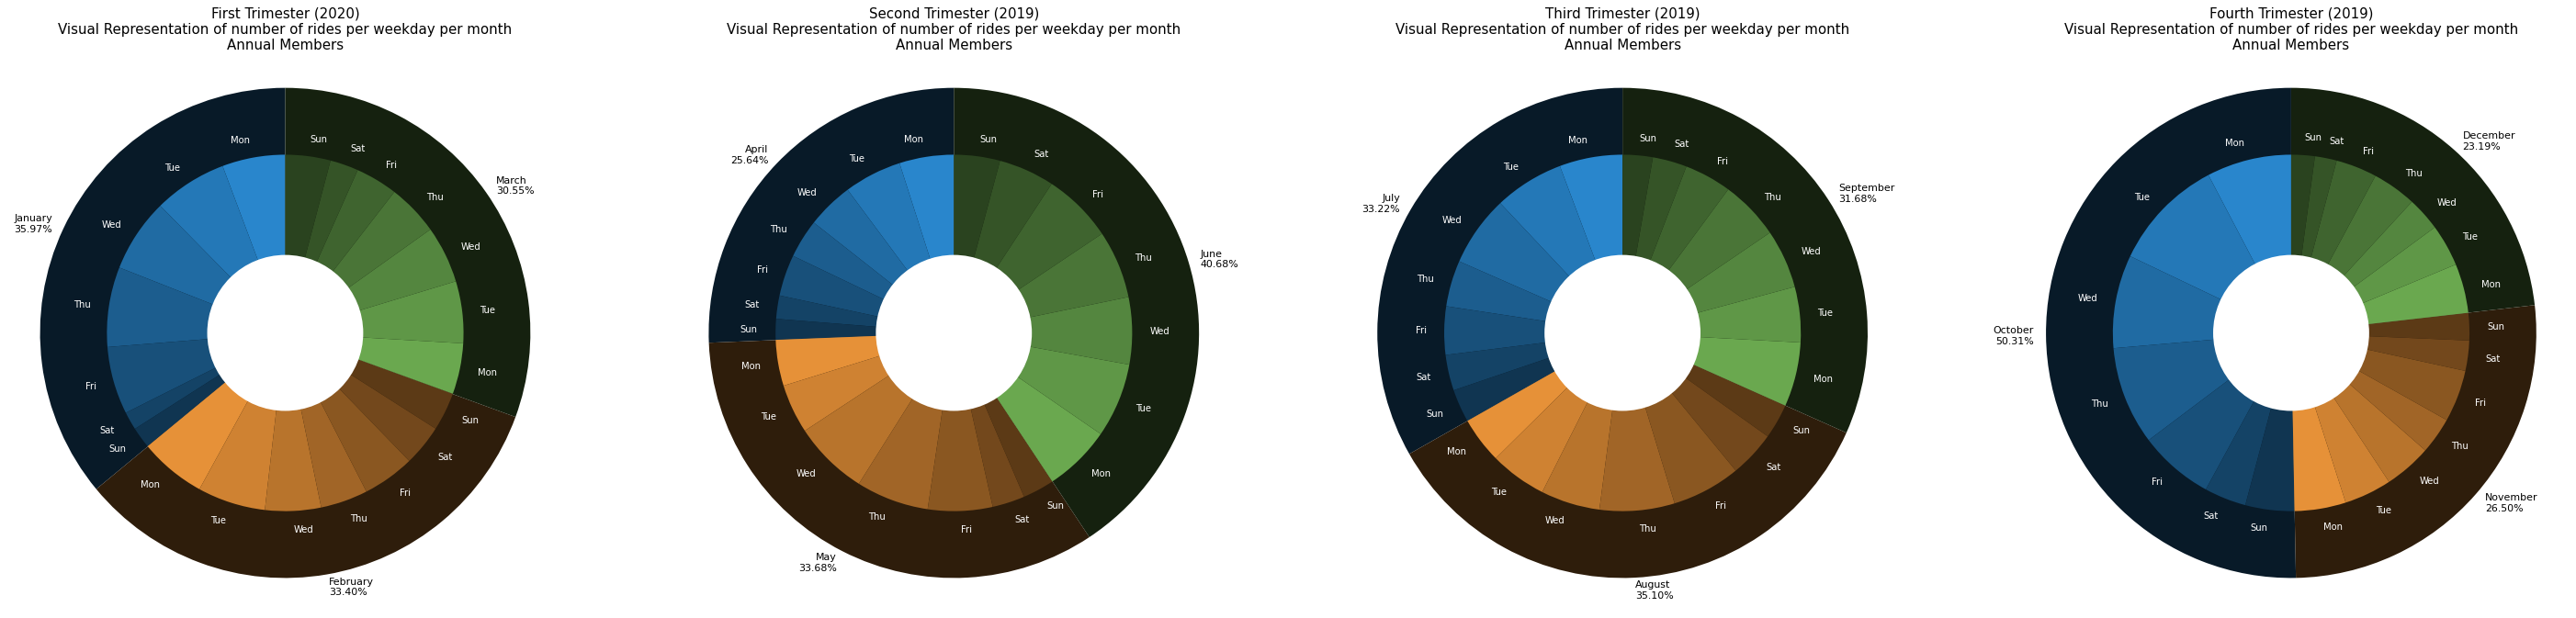

In [58]:
# ANNUAL MEMBERS
# First tri 2020 
# Plot setup
months = ['January\n35.97%', 'February\n33.40%', 'March\n30.55%']
months_sizes = [35.97, 33.40, 30.55]
months_colors = ['#081a28', '#2e1d0b', '#15210f']

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes = [5.71, 6.65, 6.66, 7.24, 6.13, 1.65, 1.93, 6.04, 6.16, 5.06, 4.29, 4.72, 3.73, 3.48, 4.61, 5.61, 5.18, 4.66, 3.82, 2.57, 4.09]
weekdays_colors = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Second tri 19
# Plot setup
months_2 = ['April\n25.64%', 'May\n33.68%', 'June\n40.68%']
months_sizes_2 = [25.64, 33.68, 40.68]
months_colors_2 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_2 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_2 = [4.93, 5.23, 4.22, 3.51, 3.74, 2.11, 1.88, 4.17, 4.46, 6.81, 6.59, 5.85, 2.94, 2.87, 6.09, 6.75, 6.08, 6.16, 6.37, 5.07, 4.17]
weekdays_colors_2 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Third tri 19
# Plot setup
months_3 = ['July\n33.22%', 'August\n35.10%', 'September\n31.68%']
months_sizes_3 = [33.22, 35.10, 31.68]
months_colors_3 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_3 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_3 = [5.71, 6.31, 6.40, 4.18, 4.37, 3.24, 3.00, 4.20, 5.15, 5.36, 6.79, 6.23, 4.19, 3.17, 5.83, 5.02, 5.34, 5.39, 4.27, 3.10, 2.73]
weekdays_colors_3 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']
# Fourth tri 19
# Plot setup
months_4 = ['October\n50.31%', 'November\n26.50%', 'December\n23.19%']
months_sizes_4 = [50.31, 26.50, 23.19]
months_colors_4 = ['#081a28', '#2e1d0b', '#15210f']

weekdays_4 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdays_sizes_4 = [7.68, 10.24, 8.45, 8.90, 6.79, 3.80, 4.44, 4.65, 4.30, 4.30, 3.32, 4.71, 2.74, 2.48, 4.47, 3.82, 3.07, 4.00, 3.73, 1.98, 2.13]
weekdays_colors_4 = ['#2986cc', '#2478b7', '#206ba3', '#1c5d8e', '#18507a', '#144366', '#103551',
                   '#e69138', '#cf8232', '#b8742c', '#a16527', '#8a5721', '#73481c', '#5c3a16',
                   '#6aa84f', '#5f9747', '#54863f', '#4a7537', '#3f642f', '#355427', '#2a431f']

# Create figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(50,25))
# Plot using ax1
outer_circle = ax1.pie(months_sizes, labels=months, colors=months_colors, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle = ax1.pie(weekdays_sizes, labels=weekdays, colors=weekdays_colors, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax1.add_artist(centre_circle)
ax1.set_title('First Trimester (2020)\nVisual Representation of number of rides per weekday per month\nAnnual Members', loc='center', fontsize=15, color='black')

# Plot using ax2
outer_circle_2 = ax2.pie(months_sizes_2, labels=months_2, colors=months_colors_2, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_2 = ax2.pie(weekdays_sizes_2, labels=weekdays_2, colors=weekdays_colors_2, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_2 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax2.add_artist(centre_circle_2)
ax2.set_title('Second Trimester (2019)\nVisual Representation of number of rides per weekday per month\nAnnual Members', loc='center', fontsize=15, color='black')

# Plot using ax3
outer_circle_3 = ax3.pie(months_sizes_3, labels=months_3, colors=months_colors_3, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_3 = ax3.pie(weekdays_sizes_3, labels=weekdays_3, colors=weekdays_colors_3, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_3 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax3.add_artist(centre_circle_3)
ax3.set_title('Third Trimester (2019)\nVisual Representation of number of rides per weekday per month\nAnnual Members', loc='center', fontsize=15, color='black')

# Plot using ax4
outer_circle_4 = ax4.pie(months_sizes_4, labels=months_4, colors=months_colors_4, radius=1.1, startangle=90, frame=True, textprops={'color':"black", 'size': 11},labeldistance=1.05)
inner_circle_4 = ax4.pie(weekdays_sizes_4, labels=weekdays_4, colors=weekdays_colors_4, radius=0.8, startangle=90, textprops={'color':"w", 'size': 10})
centre_circle_4 = plt.Circle((0, 0), 0.35, color='white', linewidth=0)
ax4.add_artist(centre_circle_4)
ax4.set_title('Fourth Trimester (2019)\nVisual Representation of number of rides per weekday per month\nAnnual Members', loc='center', fontsize=15, color='black')
plt.show()

#### **Most used stations - All Users**

In [41]:
# See what are the most used stations

data_start = final_df_v3['start_station_name'].value_counts().head(32)
data_end = final_df_v3['end_station_name'].value_counts().head(32)
order_viz = list(range(0, 30))
order_viz

loli_df = pd.concat([data_start, data_end], axis=1).dropna()
loli_df.reset_index(level=0, inplace=True)
loli_df.rename(columns={'index': 'street_name', 'start_station_name': 'count_start', 'end_station_name': 'count_end'}, inplace=True)
loli_df['full_count'] = (loli_df['count_start'] + loli_df['count_end']) / 1000
loli_df.sort_values(by=['full_count'], ascending=False, inplace=True)

loli_df

,street_name,count_start,count_end,full_count
0,Streeter Dr & Grand Ave,68378.0,81819.0,150.197
1,Canal St & Adams St,55860.0,51706.0,107.566
3,Clinton St & Madison St,50140.0,47306.0,97.446
4,Clinton St & Washington Blvd,46395.0,50153.0,96.548
2,Lake Shore Dr & Monroe St,50531.0,41346.0,91.877
8,Lake Shore Dr & North Blvd,35004.0,42896.0,77.900
6,Michigan Ave & Washington St,37237.0,40146.0,77.383
7,Michigan Ave & Oak St,35966.0,38386.0,74.352
9,Millennium Park,34542.0,38072.0,72.614
13,Theater on the Lake,32669.0,36599.0,69.268


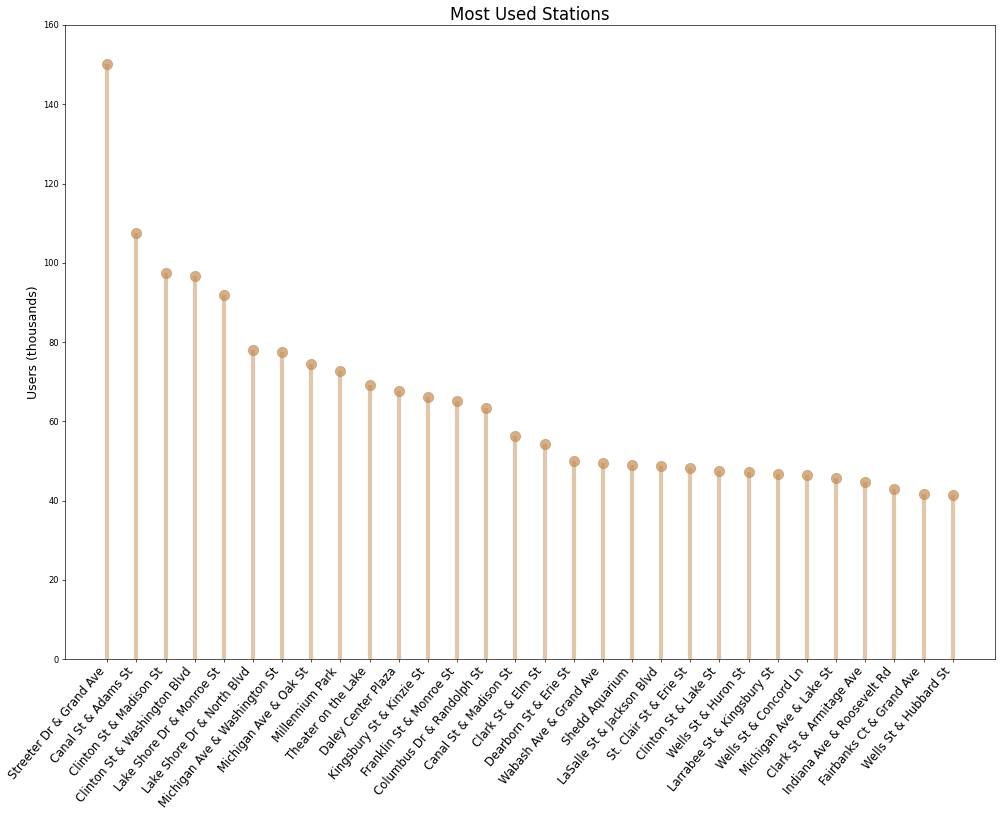

In [42]:
order_viz = list(range(0, 30))

fig, ax = plt.subplots(figsize=(20,14), dpi=60)
ax.vlines(x=order_viz, ymin=0, ymax=loli_df['full_count'], color='#c48e55', linewidth=5, alpha=0.5)
ax.scatter(x=order_viz, y=loli_df['full_count'], s=150, color='#c48e55', alpha=0.7)

ax.set_title('Most Used Stations', fontdict={'size':20})
ax.set_ylabel('Users (thousands)', fontsize=15)
ax.set_xticks(order_viz)
ax.set_xticklabels(loli_df.street_name, rotation=50, fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_ylim(0, 160)

plt.show()

#### **Most used routes - All Users**

In [43]:
routes_df = pd.concat([final_df_v3['start_station_name'], final_df_v3['end_station_name'], final_df_v3['month']], axis=1)
routes_df['most_used_routes'] = routes_df['start_station_name'] + ' to ' + routes_df['end_station_name']
routes_df.head(15)

,start_station_name,end_station_name,month,most_used_routes
0,Western Ave & Leland Ave,Clark St & Leland Ave,Jan,Western Ave & Leland Ave to Clark St & Leland Ave
1,Clark St & Montrose Ave,Southport Ave & Irving Park Rd,Jan,Clark St & Montrose Ave to Southport Ave & Irv...
2,Broadway & Belmont Ave,Wilton Ave & Belmont Ave,Jan,Broadway & Belmont Ave to Wilton Ave & Belmont...
3,Clark St & Randolph St,Fairbanks Ct & Grand Ave,Jan,Clark St & Randolph St to Fairbanks Ct & Grand...
4,Clinton St & Lake St,Wells St & Hubbard St,Jan,Clinton St & Lake St to Wells St & Hubbard St
5,Wells St & Hubbard St,Desplaines St & Randolph St,Jan,Wells St & Hubbard St to Desplaines St & Rando...
6,Desplaines St & Randolph St,Wells St & Hubbard St,Jan,Desplaines St & Randolph St to Wells St & Hubb...
7,Desplaines St & Randolph St,Wells St & Hubbard St,Jan,Desplaines St & Randolph St to Wells St & Hubb...
8,Wells St & Hubbard St,Desplaines St & Randolph St,Jan,Wells St & Hubbard St to Desplaines St & Rando...
9,Clark St & Lake St,Orleans St & Merchandise Mart Plaza,Jan,Clark St & Lake St to Orleans St & Merchandise...


In [44]:
# See what are the most used routes

most_used_routes = pd.DataFrame(data=routes_df['most_used_routes'].value_counts().head(15))
most_used_routes.reset_index(level=0, inplace=True)
most_used_routes.rename(columns={'index': 'route', 'most_used_routes': 'count'}, inplace=True)
# Invert DF
most_used_routes = most_used_routes.iloc[::-1]
most_used_routes.reset_index(inplace=True)
most_used_routes.drop(columns='index', inplace=True)
most_used_routes


,route,count
0,Theater on the Lake to Streeter Dr & Grand Ave,2840
1,Millennium Park to Streeter Dr & Grand Ave,3075
2,Streeter Dr & Grand Ave to Lake Shore Dr & Nor...,3087
3,Millennium Park to Millennium Park,3119
4,Montrose Harbor to Montrose Harbor,3183
5,Streeter Dr & Grand Ave to Theater on the Lake,3309
6,Streeter Dr & Grand Ave to Lake Shore Dr & Mon...,3378
7,Streeter Dr & Grand Ave to Millennium Park,3386
8,HQ QR to HQ QR,3556
9,Shedd Aquarium to Streeter Dr & Grand Ave,3638


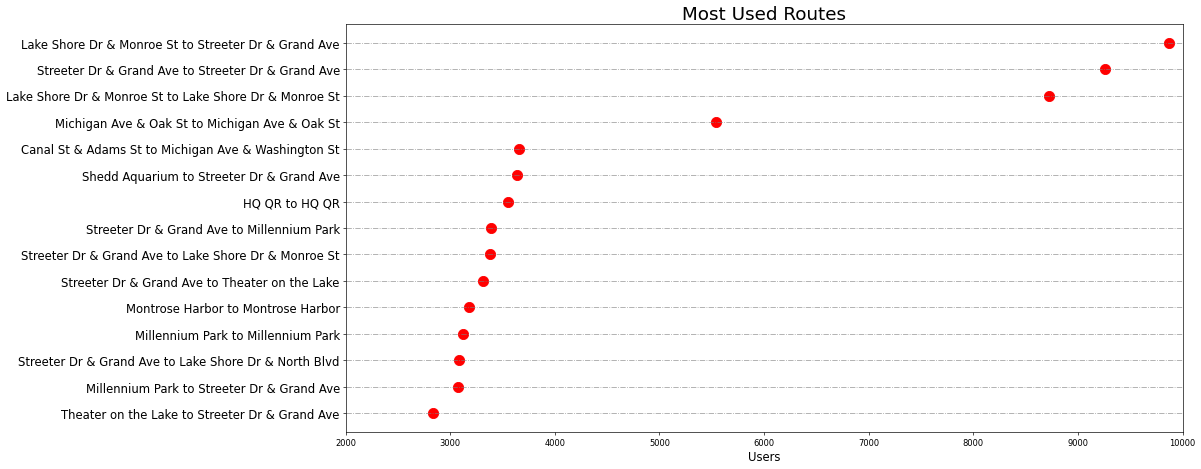

In [45]:
# Draw plot
fig,ax = plt.subplots(figsize=(18,9), dpi=60)
ax.hlines(y=most_used_routes.index, xmin=2000, xmax=10000, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=most_used_routes.index, x=most_used_routes['count'], s=150, color='red')

# Title, Labels, Ticks and Xlimit
ax.set_title('Most Used Routes', fontdict={'size':22})
ax.set_xlabel('Users', fontsize=14)
ax.set_yticks(most_used_routes.index)
ax.set_yticklabels(most_used_routes['route'], fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_xlim(2000, 10000)
plt.show()

# **6. Act**




### **Final Conclusions**

**Annual Members vs Casuals Users**
  * A **casual user** uses Cyclistic for an average of about **58 minutes** per bike ride.
  * An **annual member** uses Cyclistic for an average of about **14 minutes** per bike ride.
  *  **January** represents **16% of casual users** and **36% of annual members** on the **first trimester of 2020**.
    * This month **casual users** prefer the following days:
      * **Tuesday | Wednesday | Friday**
    * This month **annual members** prefer the following days:
      * **Tuesday | Wednesday | Thursday**
  *  **February** represents **27% of casual users** and **33% of annual members** on the **first trimester of 2020**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Wednesday**
  *  **March** represents **57% of casual users** and **31% of annual members** on the **first trimester of 2020**.
    * This month **casual users** prefer the following days:
      * **Wednesday | Sunday | Saturday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Wednesday**
  *  **April** represents **18% of casual users** and **26% of annual members** on the **second trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Monday | Sunday | Saturday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Wednesday**  
  *  **May** represents **32% of casual users** and **34% of annual members** on the **second trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Wednesday | Thursday | Friday**~
  *  **June** represents **50% of casual users** and **40% of annual members** on the **second trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Tuesday | Wednesday | Thursday**
  *  **July** represents **36% of casual users** and **33% of annual members** on the **third trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Wednesday**
  *  **August** represents **38% of casual users** and **35% of annual members** on the **third trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Wednesday | Thursday | Friday**
  *  **September** represents **26% of casual users** and **32% of annual members** on the **third trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Monday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Wednesday**
  *  **October** represents **67% of casual users** and **50% of annual members** on the **fourth trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Tuesday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Tuesday | Wednesday | Thursday**
  *  **November** represents **18% of casual users** and **27% of annual members** on the **fourth trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Friday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Monday | Wednesday | Friday**
  *  **December** represents **15% of casual users** and **23% of annual members** on the **fourth trimester of 2019**.
    * This month **casual users** prefer the following days:
      * **Thursday | Saturday | Sunday**
    * This month **annual members** prefer the following days:
      * **Monday | Tuesday | Thursday**

**All Users**
  * The top 5 months that register the most bike riders, **casual users** and **annual** members are: **June | July | August | September | October**
  * The top 10 **most used stations**: 
    1. Streeter Dr & Grand Ave
    2. Canal St & Adams St
    3. Clinton St & Madison St
    4. Clinton St & Washington Blvd
    5. Lake Shore Dr & Monroe St
    6. Lake Shore Dr & North Blvd
    7. Michigan Ave & Washington St
    8. Michigan Ave & Oak St
    9. Millennium Park
    10. Theater on the Lake
  * The top 10 **most used routes**: 
    1. Lake Shore Dr & Monroe St => Streeter Dr & Grand Ave
    2. Streeter Dr & Grand Ave => Streeter Dr & Grand Ave
    3. Lake Shore Dr & Monroe St => Lake Shore Dr & Monroe St
    4. Michigan Ave & Oak St => Michigan Ave & Oak St
    5. Canal St & Adams St => Michigan Ave & Washington St
    6. Shedd Aquarium => Streeter Dr & Grand Ave
    7. HQ QR => HQ QR
    8. Streeter Dr & Grand Ave => Millennium Park
    9. Streeter Dr & Grand Ave => Lake Shore Dr & Monroe St
    10. Streeter Dr & Grand Ave => Theater on the Lake

### **Recommendations**
  * Casual users use Cyclistic mostly on weekends. Create promotions to attract them to use the service more during the rest of the week.
  * Focus physical promotion on the top 10 most used stations and routes.
  * Focus promotions on the top 5 months as they record substancially more usage.
  * Offer discounts for shorter rides in order to attract casual users as they often utilize Cyclistic for much more lengthy rides. 
